Features Added:
- `oppotunity_duration = opportunity_end_date - opportuntiy_start_date`
- `engagement_time = opportunity_start_date - apply_date`
- `duration_age_engagement = opportunity_duration * age`
- `engagement_score = 40% opportunity_duration + 30% age + 30% engagement_time`

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import textwrap # library of wrapping large names

import random # for assiging colors randomly

## Importing Dataset

###Option 1:

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_name = '/content/drive/MyDrive/Team 10- AI Data Analyst/Week 2 Deliverable/Cleaned_Dataset_Week1.csv' # Get the uploaded file name
#Load the dataset, specifying the encoding
df = pd.read_csv(file_name, encoding='latin1')

Mounted at /content/drive


###Option 2:

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
#file_name = list(uploaded.keys())[0]  # Get the uploaded file name
# Load the dataset, specifying the encoding
#df = pd.read_csv(file_name, encoding='latin1')

## How many rows and columns we have in dataset?

In [6]:
df.shape

(8536, 39)

In [7]:
# increasing the display range of rows and columns
pd.set_option('display.max_rows', 9000)
pd.set_option('display.max_columns', 50)

## How does dataset looks like?

In [8]:
df.sample(5)

,learner_signup_datetime,opportunity_id,opportunity_name,opportunity_category,opportunity_end_date,first_name,date_of_birth,gender,country,institution_name,current/intended_major,entry_created_at,status_description,status_code,apply_date,opportunity_start_date,age,opportunity_duration,learner_signup_datetime_year,learner_signup_datetime_month,learner_signup_datetime_day,opportunity_end_date_year,opportunity_end_date_month,opportunity_end_date_day,date_of_birth_year,date_of_birth_month,date_of_birth_day,entry_created_at_year,entry_created_at_month,entry_created_at_day,apply_date_year,apply_date_month,apply_date_day,opportunity_start_date_year,opportunity_start_date_month,opportunity_start_date_day,engagement_time,duration_age_interaction,engagement_score
4334,2024-02-25,00000000-0GWQ-AXC5-X45C-2MHJ28,Data Visualization,Internship,2024-03-11,Sreehari,2000-08-14,Male,United States,Saint Louis University,Information Systems,2024-03-11,Rejected,1030,2024-02-25,2024-01-08,24,63,2024,2,25,2024,3,11,2000,8,14,2024,3,11,2024,2,25,2024,1,8,48,1512,46.8
5736,2023-08-17,00000000-10S6-HVRK-ZDAM-90C0F8,Startup Mastery Workshop,Event,2024-02-17,Podupati,1999-07-04,Male,United States,Nalla narsimha Reddy group of institutions,Computer Information Systems,2024-03-11,Team Allocated,1070,2023-08-23,2024-02-17,25,0,2023,8,17,2024,2,17,1999,7,4,2024,3,11,2023,8,23,2024,2,17,-178,0,-45.9
3420,2023-11-11,00000000-0GHB-4N83-QX9K-JM48K2,Project Management,Internship,2024-03-11,James,1998-12-02,Male,India,NAGPUR UNIVERSITY,Business Analytics,2024-03-11,Rejected,1030,2023-11-11,2024-01-08,26,63,2023,11,11,2024,3,11,1998,12,2,2024,3,11,2023,11,11,2024,1,8,-58,1638,15.6
1670,2023-08-24,00000000-0GNT-FT74-MZT8-93VC0G,Digital Marketing,Internship,2024-03-11,Aravind Kumar,2000-10-18,Male,India,Vaagdevi Engineering College,Information Systems,2024-03-11,Rejected,1030,2023-10-06,2024-01-08,24,63,2023,8,24,2024,3,11,2000,10,18,2024,3,11,2023,10,6,2024,1,8,-94,1512,4.2
8299,2023-06-16,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-03-08,Madhuri,2000-04-16,Female,India,Balaji institute of technology and science,Information Systems,2024-03-11,Team Allocated,1070,2024-02-21,2024-03-08,24,0,2023,6,16,2024,3,8,2000,4,16,2024,3,11,2024,2,21,2024,3,8,-16,0,2.4


## Getting info about columns—their data types and how many are there in them

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   learner_signup_datetime        8536 non-null   object 
 1   opportunity_id                 8536 non-null   object 
 2   opportunity_name               8536 non-null   object 
 3   opportunity_category           8536 non-null   object 
 4   opportunity_end_date           8536 non-null   object 
 5   first_name                     8534 non-null   object 
 6   date_of_birth                  8536 non-null   object 
 7   gender                         8536 non-null   object 
 8   country                        8536 non-null   object 
 9   institution_name               8536 non-null   object 
 10  current/intended_major         8536 non-null   object 
 11  entry_created_at               8536 non-null   object 
 12  status_description             8536 non-null   o

## How many duplicate rows we have in our dataset

In [10]:
df.duplicated().sum()

np.int64(6)

### Removing duplicate rows

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(8530, 39)

## Creating Age group column

In [13]:
df.age.unique()

array([24, 23, 25, 28, 18, 19, 26, 27, 20, 30, 33, 22, 21, 29, 40, 31, 34,
       35, 41, 39, 17, 37, 43, 53, 14, 48, 42, 32, 15, 38, 36, 50, 44, 47,
       16, 49, 57, 45, 51, 46, 52, 58])

#### creating age_group column
age_brackets:
- Teenagers (≤19)
- Early 20s (20-24)
- Mid 20s (25-29)
- 30s (30-39)
- 40s (40-49)
- 50+ (50 and above)

In [14]:
# Defining age bins and labels
bins = [0, 19, 24, 29, 39, 49, np.inf]  # breakpoints
labels = ["Teenagers (≤19)", "Early 20s (20-24)", "Mid 20s (25-29)",
          "30s (30-39)", "40s (40-49)", "50+ (50 and above)"]

# Creating 'age_group' column
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

In [15]:
# Verifing the new column
print(df[["age", "age_group"]].head(10))

   age          age_group
0   24  Early 20s (20-24)
1   24  Early 20s (20-24)
2   23  Early 20s (20-24)
3   25    Mid 20s (25-29)
4   24  Early 20s (20-24)
5   28    Mid 20s (25-29)
6   23  Early 20s (20-24)
7   18    Teenagers (≤19)
8   19    Teenagers (≤19)
9   26    Mid 20s (25-29)


### Creating Drop off column

##### Creating `"drop_off_status"` Column Using `"status_description"`
- **1 = Dropped Off** (if `status_description` is **"Withdraw"**, **"Dropped Out"**)
- **0 = Not Dropped Off** (if `status_description` is **"Started"**, **"Team Allocated"**, **"Rewards Award"**,**"Applied"**, **"Waitlisted"**, or **"Rejected"**)

In [16]:
# Defining drop-off statuses
drop_off_statuses = ["Dropped out", "Withdraw"]

# Creating drop_off_status column (1 = dropped off, 0 = did not drop off)
df["drop_off_status"] = np.where(df["status_description"].isin(drop_off_statuses), 1, 0)

---

### Defining color palette matching with Excelerate Logo

In [17]:
# Custom color palette
color_palette = [ "#fa734d",  # Orange-Red
    "#f26258",
    "#ea525f",
    "#e1426b",
    "#d73378",
    "#cd2484",
    "#c31590",
    "#b8049b",
    "#a902a3",
    "#9704aa",
    "#8606b0",
    "#7408b6",
    "#5f0abc"]  # Deep Purple]


def get_colors(n):
    if n <= 13:
        return random.sample(color_palette, n)  # Randomly pick n colors
    else:
        return sns.color_palette("coolwarm", n)  # Use interpolated colors

def set_seaborn_palette(n):
    sns.set_palette(get_colors(n))  # Apply colors globally

### Drop-off Rate by Opportunity Category

In [18]:
# Calculating drop-off rate per opportunity category
drop_off_summary = df.groupby("opportunity_category")["drop_off_status"].mean().reset_index()

# Renaming columns for better clarity
drop_off_summary.columns = ["Opportunity Category", "Drop-off Rate"]

In [19]:
# result
print(drop_off_summary)

  Opportunity Category  Drop-off Rate
0          Competition       0.002353
1               Course       0.010891
2           Engagement       0.000000
3                Event       0.003670
4           Internship       0.010904


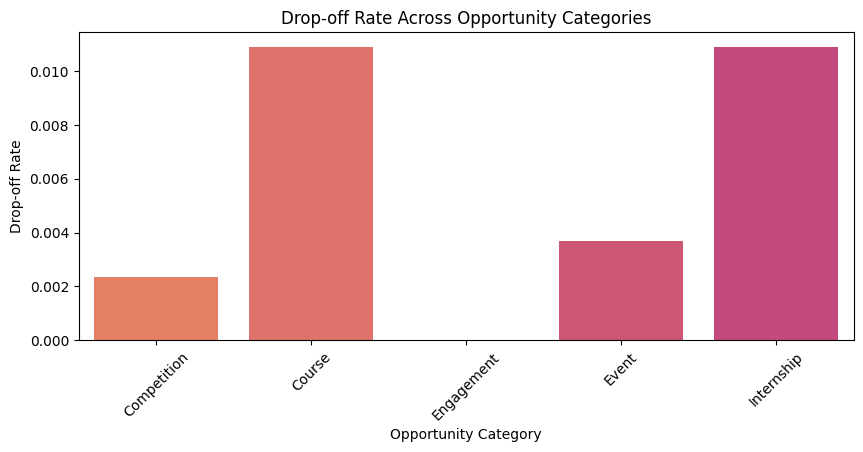

In [20]:
# Visualization
plt.figure(figsize=(10, 4))
sns.barplot(x="Opportunity Category", y="Drop-off Rate", data=drop_off_summary, palette=color_palette)
plt.title("Drop-off Rate Across Opportunity Categories")
plt.xlabel("Opportunity Category")
plt.ylabel("Drop-off Rate")
plt.xticks(rotation=45)
plt.show()

#### Insights: Drop-off Rate by Opportunity Category  

1. **Internships and Courses Have the Highest Drop-off Rates (~1.09%)**  
   - Learners are more likely to drop out from **internships and courses** compared to other categories.  
   - This could be due to high time commitment, difficulty level, or misalignment with expectations.  

2. **Engagement Opportunities Have 0% Drop-off**  
   - Engagement opportunities retain learners **exceptionally well**.  
   - These might be more flexible, require lower effort, or provide immediate value.  

3. **Competitions and Events Have Low Drop-off Rates (~0.2% - 0.36%)**  
   - Learners tend to stay engaged with competitions and events, possibly due to shorter durations or tangible rewards.  

#### Recommendations: Reducing Drop-offs  

1. **For Internships & Courses:**  
   - Provide **clear expectations** before enrollment to align learner goals.  
   - Offer **mentorship or peer support** to assist learners through difficulties.  
   - Introduce **progress tracking & milestone rewards** to keep learners engaged.  

2. **Leverage Engagement Strategies:**  
   - Analyze what makes engagement opportunities successful and **replicate** those elements in internships and courses.  
   - Incorporate **gamification, interactive sessions, or community engagement** to maintain interest.  

3. **Survey Dropouts to Identify Pain Points:**  
   - Conduct exit surveys to understand **why learners drop out** of high-churn categories.  
   - Use insights to **redesign opportunity structures** for better retention.  

4. **Flexible Completion Options:**  
   - Consider **modular learning or flexible deadlines** for courses & internships.  
   - Allow learners to **pause & resume** opportunities instead of dropping out.  


### Drop-off Rate by Opportunity

In [21]:
df.opportunity_name.unique()

array(['Career Essentials: Getting Started with Your Professional Journey',
       'Slide Geeks: A Presentation Design Competition',
       'Digital Marketing', 'Health Care Management',
       'Innovation & Entrepreneurship', 'Project Management',
       'Data Visualization', 'CPR/AED Certification',
       'Mental and Physical Health Session',
       'Jump Start: Developing your Emotional Intelligence',
       'Join a Student Organisation', 'Upload Your First Year Transcript',
       'Startup Mastery Workshop', 'AI Ethics Challenge',
       'Data Visualization Associate',
       'Digital Strategy Virtual Internship',
       'Project Management Associate', 'Business Consulting',
       'UrbanRenew Challenge', 'UX Redesign Challenge',
       'Xperience Design Hackathon', 'Freelance Mastery workshop'],
      dtype=object)

In [22]:
drop_off_summary3 = df.groupby('opportunity_name')['drop_off_status'].mean().reset_index()
drop_off_summary3.columns = ["Opportunity Name", "Drop-off Rate"]

In [23]:
# result
print("Drop off by Opportunity:")
print(drop_off_summary3)

Drop off by Opportunity:
                                     Opportunity Name  Drop-off Rate
0                                 AI Ethics Challenge       0.000000
1                                 Business Consulting       0.008316
2                               CPR/AED Certification       0.012953
3   Career Essentials: Getting Started with Your P...       0.012057
4                                  Data Visualization       0.010225
5                        Data Visualization Associate       0.009074
6                                   Digital Marketing       0.003584
7                 Digital Strategy Virtual Internship       0.012121
8                          Freelance Mastery workshop       0.000000
9                              Health Care Management       0.025510
10                      Innovation & Entrepreneurship       0.007160
11                        Join a Student Organisation       0.000000
12  Jump Start: Developing your Emotional Intellig...       0.000000
13       

In [24]:
# Sorting data in descending order of Drop-off Rate
drop_off_summary3 = drop_off_summary3.sort_values(by="Drop-off Rate", ascending=False)

In [25]:
# Wrapping text for long Opportunity Names
drop_off_summary3["Opportunity Name"] = drop_off_summary3["Opportunity Name"].apply(lambda x: "\n".join(textwrap.wrap(x, width=20)))

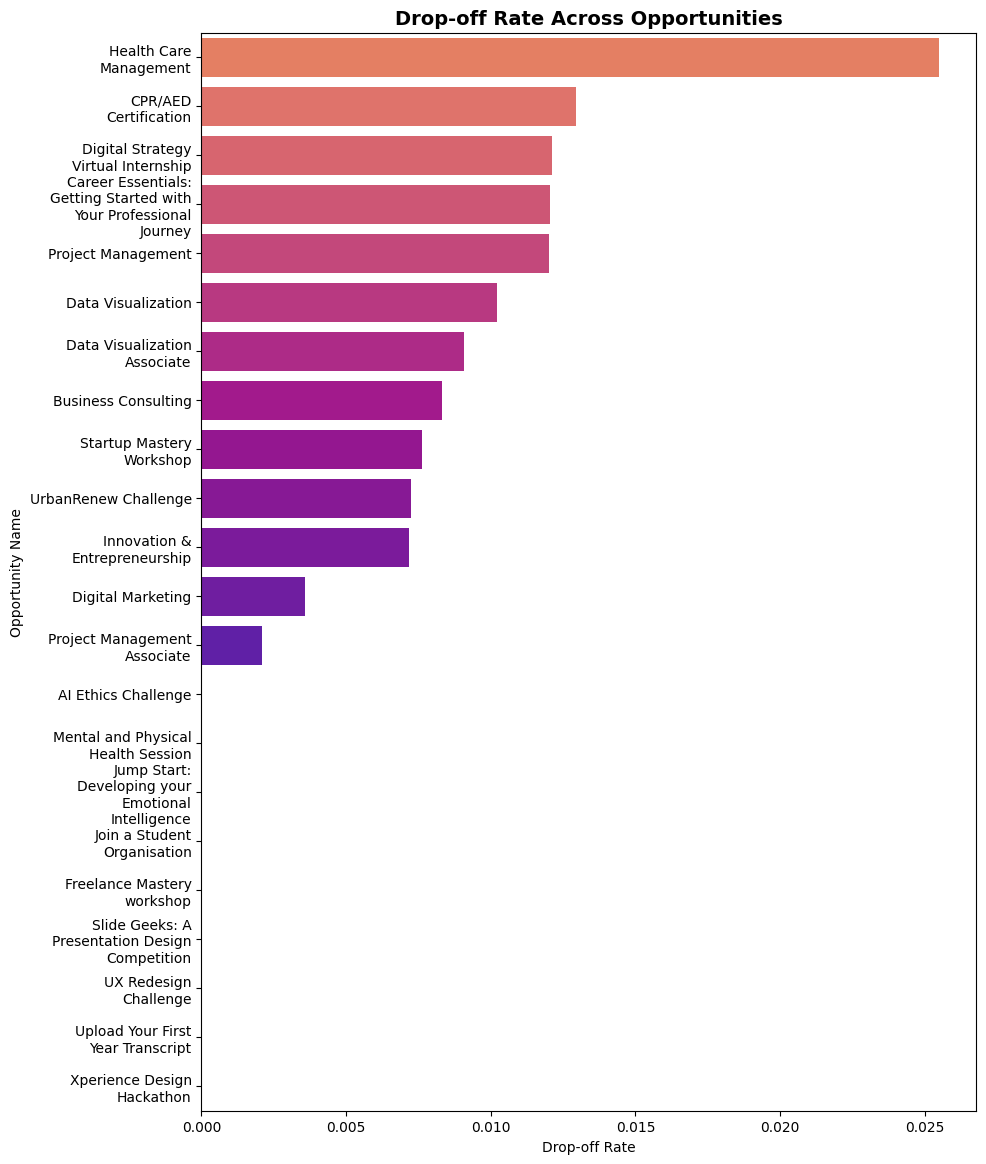

In [26]:
# Adjustting palette for dynamic category count
num_categories = len(drop_off_summary3)
palette = sns.color_palette(color_palette, n_colors=num_categories)

# Visualization
plt.figure(figsize=(10, 14))
sns.barplot(y="Opportunity Name", x="Drop-off Rate", data=drop_off_summary3, palette=palette)

# Titles and labels
plt.title("Drop-off Rate Across Opportunities", fontsize=14, fontweight="bold")
plt.xlabel("Drop-off Rate")
plt.ylabel("Opportunity Name")

plt.show()

#### Insights: Drop-off Rate by Opportunity  

1. **Health Care Management Has the Highest Drop-off Rate (2.55%)**  
   - Learners are struggling the most with **Health Care Management**, possibly due to complexity, workload, or lack of alignment with expectations.  
   - Targeted interventions are needed to improve retention.  

2. **Technical & Business Courses Show Moderate Drop-offs (~1.0% - 1.3%)**  
   - **CPR/AED Certification, Career Essentials, Data Visualization, Digital Strategy Internship, and Project Management** have notable drop-offs.  
   - These may require **higher effort, longer duration, or skill prerequisites**, leading to disengagement.  

3. **Zero Drop-off in Certain Engagement-Based & Competitive Opportunities**  
   - Opportunities like **AI Ethics Challenge, Freelance Mastery Workshop, UX Redesign Challenge, and Hackathons** have **zero drop-outs**.  
   - These may be **short-term, interactive, or challenge-based**, making them more engaging.  

4. **Competitions & Workshops Have Strong Retention**  
   - Sessions like **Slide Geeks (Presentation Competition), Startup Mastery Workshop, and Mental & Physical Health Session** have **high retention rates**.  
   - This suggests that **interactive, practical, and skill-based formats** keep learners engaged.  

#### Recommendations: Reducing Drop-offs  

1. **Enhance Support for High Drop-off Opportunities**  
   - **Health Care Management & Technical Courses** need **better onboarding, mentorship, and flexible learning paths**.  
   - Provide **bite-sized content, checkpoints, and progress tracking** to improve engagement.  

2. **Leverage Best Practices from Low-Churn Opportunities**  
   - Gamify elements of learning like **challenges, rewards, and interactive sessions** seen in zero-drop-off opportunities.  
   - Introduce **short-term projects, certifications, and peer collaboration** for technical courses.  

3. **Identify Drop-off Patterns by Learner Demographics**  
   - Check if drop-offs correlate with **age, education background, or country** to tailor interventions.  
   - Use **personalized recommendations** to suggest more suitable opportunities to learners.  

4. **Provide Exit Surveys & Early Warning Systems**  
   - Ask learners **why they drop out** and use insights to tweak opportunity structures.  
   - Implement **early disengagement alerts** based on inactivity and send **personalized re-engagement nudges**.  

5. **Offer Flexible Completion Options**  
   - Consider **self-paced formats, extended deadlines, or partial completion certificates** to encourage retention.  
   - Introduce **milestone-based rewards** to keep learners motivated throughout.  


### Drop-off Rate vs. Opportunity Duration

In [27]:
# Calculating Average drop-off rate per opportunity duration
drop_off_summary1 = df.groupby("opportunity_duration")["drop_off_status"].mean().reset_index()
drop_off_summary1.columns = ["Opportunity Duration (Days)", "Drop-off Rate"]

In [28]:
# result
print(drop_off_summary1.head())

   Opportunity Duration (Days)  Drop-off Rate
0                         -313       0.000000
1                          -69       0.000000
2                          -24       0.023256
3                           -7       0.013699
4                            0       0.004132


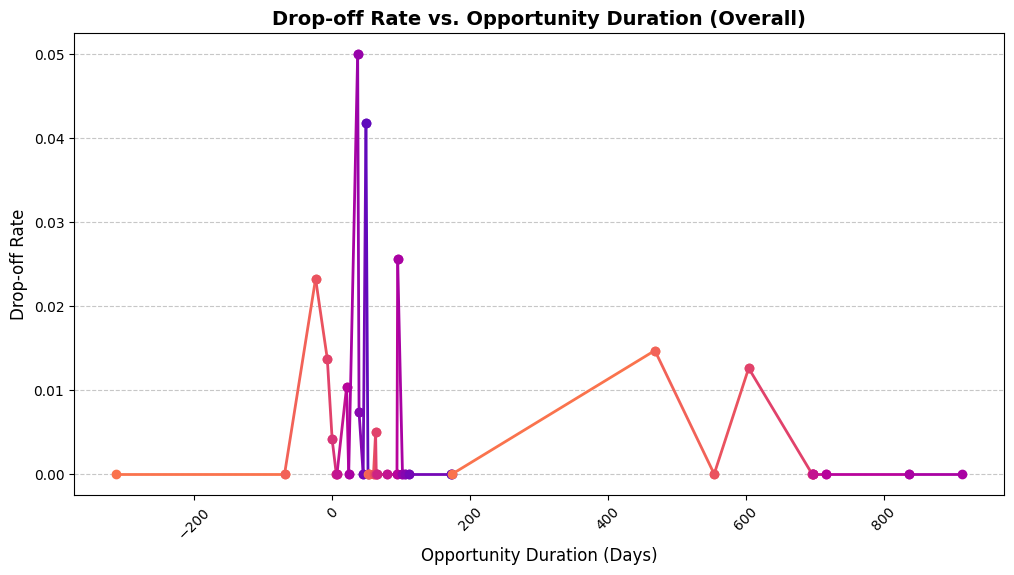

In [29]:
# Adjustting the color dynamically based on the number of data points
num_points = len(drop_off_summary1)
colors = sns.color_palette(color_palette, n_colors=num_points)

# Visualization
plt.figure(figsize=(12, 6))

# Applying gradient effect using color variation for each point
for i in range(num_points - 1):
    plt.plot(
        drop_off_summary1["Opportunity Duration (Days)"].iloc[i:i+2],
        drop_off_summary1["Drop-off Rate"].iloc[i:i+2],
        marker="o", color=colors[i], linewidth=2
    )

# Enhancing plot aesthetics
plt.title("Drop-off Rate vs. Opportunity Duration (Overall)", fontsize=14, fontweight="bold")
plt.xlabel("Opportunity Duration (Days)", fontsize=12)
plt.ylabel("Drop-off Rate", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Insights: Drop-off Rate by Opportunity Duration  

1. **Short & Ultra-Long Duration Opportunities Have the Lowest Drop-offs (0%)**  
   - Opportunities lasting **7 days or less** and **174+ days** show **zero drop-offs**.  
   - Short durations may offer **quick wins and lower commitment**, while very long ones might be **highly structured or selective**.  

2. **Drop-offs Peak at 24, 37, 49, and 95 Days**  
   - Highest drop-off rates appear at **37 days (5.0%)** and **49 days (4.17%)**, followed by **95 days (2.56%)** and **24 days (2.33%)**.  
   - These could mark **critical disengagement points** where learners lose motivation or face workload challenges.  

3. **Mid-to-Long Duration (60-112 Days) is More Stable**  
   - Opportunities lasting **60 to 112 days** show minimal drop-offs, suggesting that learners who pass the early stages tend to stay engaged.  
   - **Structured milestones** might help retain learners in this range.  

4. **Unexpected Negative Duration Values Exist**  
   - Durations **-313, -69, -24, and -7** indicate potential **data quality issues** where start dates occur after end dates.  
   - These should be investigated and corrected.  

#### Recommendations: Reducing Drop-offs  

1. **Intervene at Critical Drop-off Points (24-49 Days & 95 Days)**  
   - Send **check-in emails, reminders, or rewards** around these durations to re-engage learners.  
   - Introduce **milestone achievements** at 3-4 week marks to sustain motivation.  

2. **Analyze Course Structure for 37-49 Day Opportunities**  
   - High drop-offs in this range suggest **content difficulty, lack of engagement, or time constraints**.  
   - Provide **progress tracking, peer interactions, or flexible deadlines** to reduce churn.  

3. **Enhance Long-Term Engagement Strategies for 95+ Days**  
   - Introduce **modular content, project-based learning, and periodic feedback** to prevent burnout.  
   - Offer **flexible participation options**, such as self-paced elements.  

4. **Investigate & Fix Negative Duration Values**  
   - Identify **data errors** where **end dates precede start dates**.  
   - Ensure accurate duration tracking to avoid misleading conclusions.  

5. **Segment Learners Based on Commitment Levels**  
   - Provide **short-term, medium-term, and long-term opportunity recommendations** based on learner preferences and past engagement.  
   - Use **personalized learning paths** to improve retention.  


#### Drop-off Rate vs. Opportunity Duration with Opportunity Category

In [30]:
# Calculating drop-off rate per opportunity duration and category
drop_off_summary2 = df.groupby(["opportunity_category","opportunity_duration"])["drop_off_status"].mean().reset_index()
drop_off_summary2.columns = ["Opportunity Category","Opportunity Duration (Days)", "Drop-off Rate"]

In [31]:
# result
print(drop_off_summary2.head())

  Opportunity Category  Opportunity Duration (Days)  Drop-off Rate
0          Competition                         -313       0.000000
1          Competition                          -69       0.000000
2          Competition                           39       0.007353
3          Competition                           45       0.000000
4          Competition                           64       0.000000


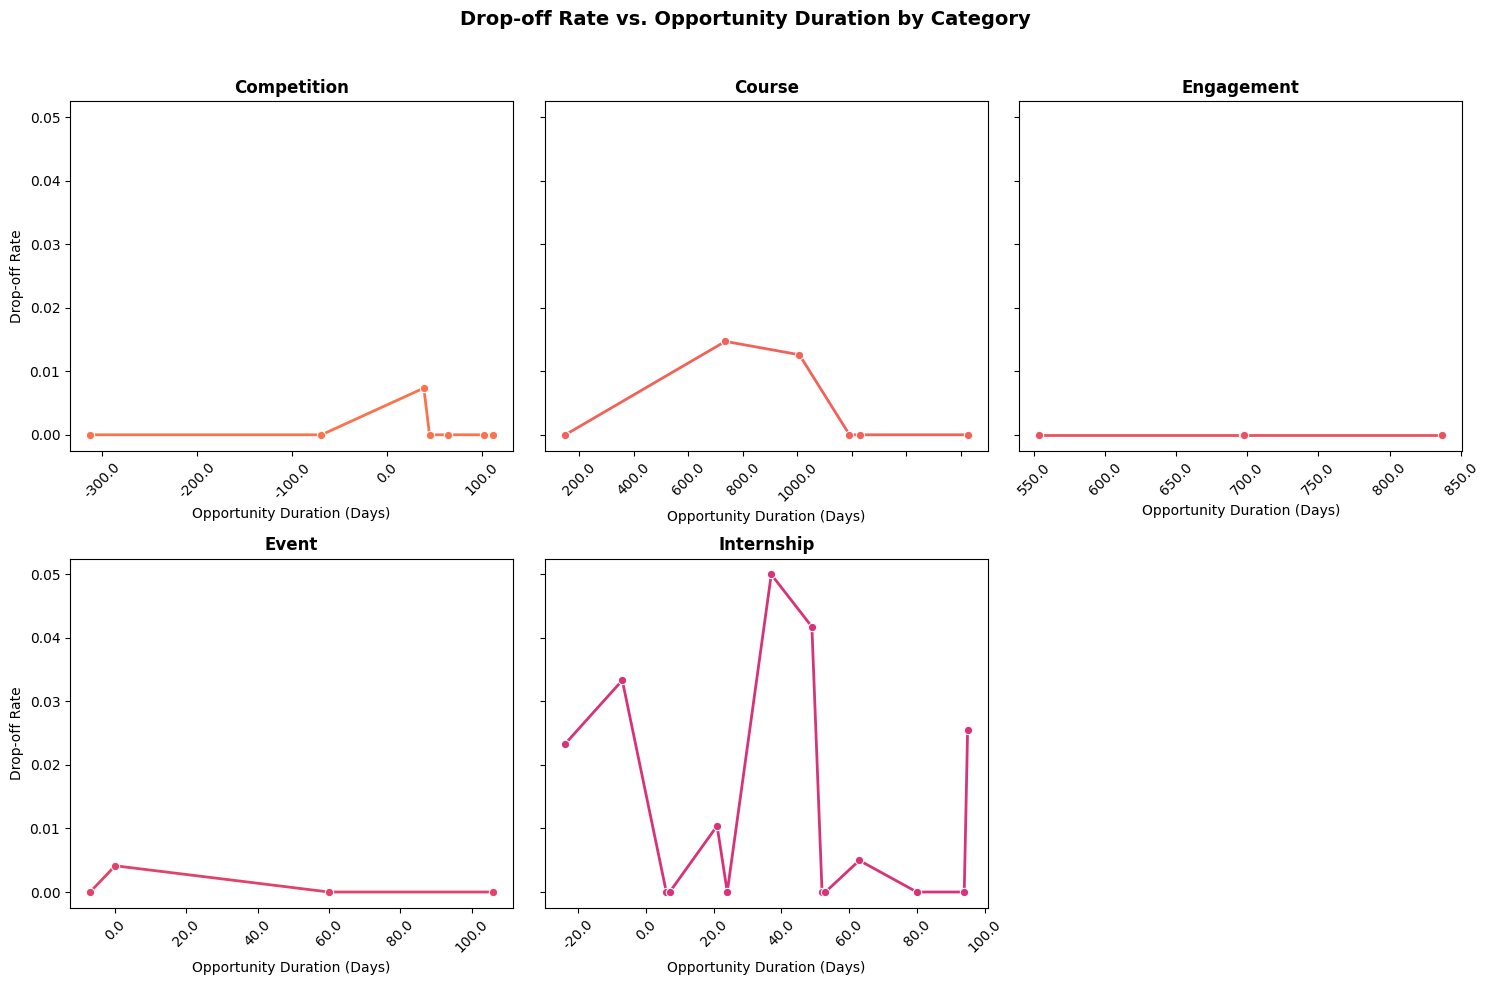

In [32]:
# Defining categories
categories = drop_off_summary2["Opportunity Category"].unique()

# Creating subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)

# Flattening axes to handle cases where we have fewer than 6 subplots
axes = axes.flatten()

# Looping through each category and plotting in its respective subplot
for i, category in enumerate(categories):
    ax = axes[i]

    # Filtering data for the current category
    data_subset = drop_off_summary2[drop_off_summary2["Opportunity Category"] == category]

    # Choosing a unique color for each category
    category_color = color_palette[i % len(color_palette)]  # Loops through palette if >13 categories

    # Plotting using seaborn lineplot
    sns.lineplot(data=data_subset, x="Opportunity Duration (Days)", y="Drop-off Rate",
                 marker="o", linewidth=2, color=category_color, ax=ax)

    # Setting title and labels
    ax.set_title(category, fontsize=12, fontweight="bold")
    ax.set_xlabel("Opportunity Duration (Days)")
    ax.set_ylabel("Drop-off Rate")

    # Rotating x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

# Removing any empty subplots (if categories < 6)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout to prevent overlap
fig.suptitle("Drop-off Rate vs. Opportunity Duration by Category", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusting layout to fit the title
plt.show()

#### Insights: Drop-off Rate vs. Opportunity Duration by Category  

1. **Competitions and Engagements Have 0% Drop-offs**  
   - Regardless of duration, **Competitions** (ranging from -313 to 112 days) and **Engagements** (554+ days) maintain **zero drop-offs**.  
   - This suggests that **short-term competitive challenges and long-term engagement programs** retain learners effectively.  

2. **Courses Face Drop-offs in Long Durations (468-604 Days)**  
   - Drop-off rates for **Courses** peak at **468 days (1.47%) and 604 days (1.26%)**.  
   - Courses with extreme durations may **lose learner interest or require better pacing and engagement strategies**.  

3. **Internships Experience the Highest Drop-offs (24-95 Days)**  
   - The highest drop-off rates are in **Internships lasting 37 days (5.0%) and 49 days (4.17%)**.  
   - Drop-offs also spike at **95 days (2.56%) and 21 days (1.04%)**, indicating potential challenges related to **commitment, workload, or lack of engagement during early stages**.  

4. **Short-Term Events Have Minimal Drop-offs**  
   - Events lasting **0-7 days** have drop-offs at **0 days (0.41%)**, suggesting that ultra-short events may fail to retain some participants.  
   - However, drop-offs vanish at **longer event durations (60+ days)**.  

5. **Negative Duration Values Indicate Data Issues**  
   - Internships and Competitions have **negative durations (-313, -69, -24, -7 days)**, which suggests **incorrect start or end date recordings**.  
   - These errors need to be investigated for accurate analysis.  

#### Recommendations: Reducing Drop-offs  

1. **Improve Retention for Mid-Duration Internships (21-95 Days)**  
   - **Introduce structured onboarding** to prevent early disengagement.  
   - Provide **mentorship, goal tracking, and milestone incentives** around **weeks 3-7** to improve retention.  

2. **Address Drop-offs in Long-Term Courses (468-604 Days)**  
   - Break content into **shorter, modular segments** to maintain engagement.  
   - Offer **progress badges, certificates, or milestone incentives** to encourage completion.  

3. **Enhance Short-Term Event Engagement**  
   - Reduce drop-offs in **0-7 day events** by **increasing pre-event interaction** (e.g., discussion forums, networking opportunities).  
   - Implement **post-event follow-ups** to keep learners engaged with future opportunities.  

4. **Fix Negative Duration Data Issues**  
   - Identify and correct **start and end date errors** in Internships and Competitions.  
   - Ensure proper **data validation** to prevent misleading insights.  

5. **Use Category-Specific Retention Strategies**  
   - **Competitions**: Leverage the **gamification element** in other opportunity types.  
   - **Internships**: Provide **clear expectations, structured tasks, and early engagement checkpoints**.  
   - **Courses**: Introduce **interactive elements and peer learning** to sustain interest in long-duration programs.  


### Engagement Time & Drop Off

`engagement_time = opportunity_start_date - apply_date`

In [33]:
# Calculating Average drop-off rate per opportunity duration
drop_off_summary4 = df.groupby("engagement_time")["drop_off_status"].mean().reset_index()
drop_off_summary4.columns = ["Engagement time (Days)", "Drop-off Rate"]

In [34]:
# result
print(drop_off_summary4.head(10)) # first 10 rows

   Engagement time (Days)  Drop-off Rate
0                    -338            0.0
1                    -337            0.0
2                    -335            0.0
3                    -322            0.0
4                    -321            0.0
5                    -317            0.0
6                    -297            0.0
7                    -296            0.0
8                    -269            0.0
9                    -268            0.0


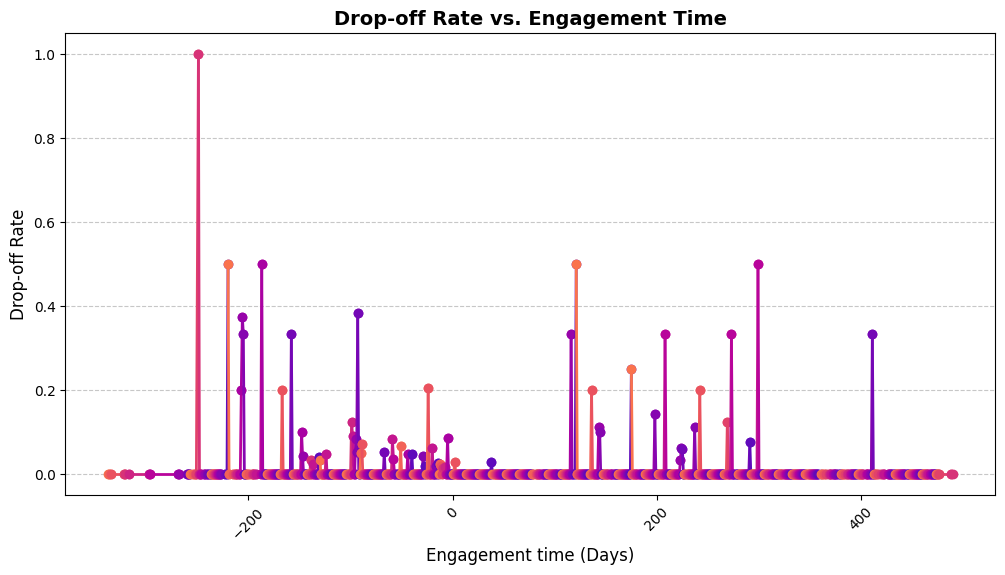

In [35]:
# Adjust the color dynamically based on the number of data points
num_points = len(drop_off_summary4)
colors = sns.color_palette(color_palette, n_colors=num_points)

# Visualization
plt.figure(figsize=(12, 6))

# Applying gradient effect using color variation for each point
for i in range(num_points - 1):
    plt.plot(
        drop_off_summary4["Engagement time (Days)"].iloc[i:i+2],
        drop_off_summary4["Drop-off Rate"].iloc[i:i+2],
        marker="o", color=colors[i], linewidth=2
    )

# Enhancing plot aesthetics
plt.title("Drop-off Rate vs. Engagement Time", fontsize=14, fontweight="bold")
plt.xlabel("Engagement time (Days)", fontsize=12)
plt.ylabel("Drop-off Rate", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### **Insights & Recommendations on Student Engagement Duration**

##### **Key Insights**
1. **Delayed Opportunity Start Impacts Engagement:**
   - A significant number of learners experience a long engagement duration (gap between apply date and opportunity start date).
   - Higher drop-off rates are observed when opportunities start too late after application, indicating a loss of interest.

2. **Early Engagement Drives Retention:**
   - Lower engagement durations (shorter gaps between application and start date) correspond to better retention rates.
   - Opportunities that begin within a reasonable timeframe see fewer drop-offs.

3. **Critical Drop-off Points Identified:**
   - Spikes in drop-off rates appear at engagement durations of 30, 60, 90+ days, suggesting learners disengage if the wait time is too long.
   - Certain opportunities with engagement durations exceeding 150+ days show intermittent drop-offs, indicating a critical threshold beyond which interest sharply declines.

4. **Sustained Engagement is Challenging for Long Wait Times:**
   - After a certain period, learners who initially stayed engaged begin to drop off, likely due to shifting priorities or competing opportunities.
   - The probability of completion significantly decreases as engagement duration increases beyond ~3 months.

---

##### **Recommendations**
1. **Reduce the Gap Between Apply Date and Opportunity Start Date:**
   - Aim to start opportunities within 15-30 days of application to maintain enthusiasm.
   - Reduce unnecessary delays in onboarding, approvals, or preparatory phases.

2. **Provide Interim Engagement Activities:**
   - If an opportunity has an unavoidable long wait time, offer pre-engagement activities such as:
     - Webinars, orientation sessions, or skill-building tasks.
     - Community interaction (forums, peer discussions) to keep learners motivated.

3. **Segment and Prioritize Opportunities Based on Start Timeliness:**
   - Track and categorize opportunities based on their engagement duration.
   - Prioritize faster-starting opportunities to enhance participation and completion rates.

4. **Optimize Communication to Maintain Interest:**
   - Regular updates, reminders, and engagement touchpoints should be sent to applicants with long waiting times.
   - Share success stories and insights from past learners to sustain motivation.

5. **Identify and Address Drop-off Trends Proactively:**
   - Monitor learners showing signs of disengagement (e.g., low interaction post-application) and intervene with targeted outreach.
   - Use predictive analytics to flag potential drop-off cases and take early action.

By implementing these strategies, we can enhance student engagement, reduce drop-offs, and improve the overall learning experience.

#### Engagement Time-Drop off rate with Opportunity as legend and drop off count as bubble size

In [36]:
# Grouping by Engagement Time & Opportunity, calculating drop-off rate & count
drop_off_summary5 = (
    df.groupby(["engagement_time", "opportunity_name"])
    .agg(drop_off_rate=("drop_off_status", "mean"), drop_off_count=("drop_off_status", "sum"))
    .reset_index()
)

In [37]:
# result dataframe
drop_off_summary5.sample(10)

,engagement_time,opportunity_name,drop_off_rate,drop_off_count
2263,198,Career Essentials: Getting Started with Your P...,0.25,1
929,-31,Health Care Management,0.00,0
1180,-9,UX Redesign Challenge,0.00,0
1614,26,Health Care Management,0.00,0
575,-82,Data Visualization,0.00,0
883,-38,Health Care Management,0.00,0
660,-66,Innovation & Entrepreneurship,0.00,0
1693,33,Digital Strategy Virtual Internship,0.00,0
1774,39,Xperience Design Hackathon,0.00,0
710,-59,Innovation & Entrepreneurship,0.00,0


In [38]:
# dropping rows where column 'drop_off_rate' & 'drop_off_count' both are zero
drop_off_summary5 = drop_off_summary5.loc[~((drop_off_summary5['drop_off_rate'] == 0) & (drop_off_summary5['drop_off_count'] == 0))].reset_index()

In [39]:
drop_off_summary5.drop(columns = "index", inplace = True)

In [40]:
drop_off_summary5.head()

,engagement_time,opportunity_name,drop_off_rate,drop_off_count
0,-249,Startup Mastery Workshop,1.0,1
1,-220,Digital Strategy Virtual Internship,1.0,1
2,-207,Data Visualization,1.0,1
3,-206,Data Visualization,0.6,3
4,-205,Data Visualization,0.5,1


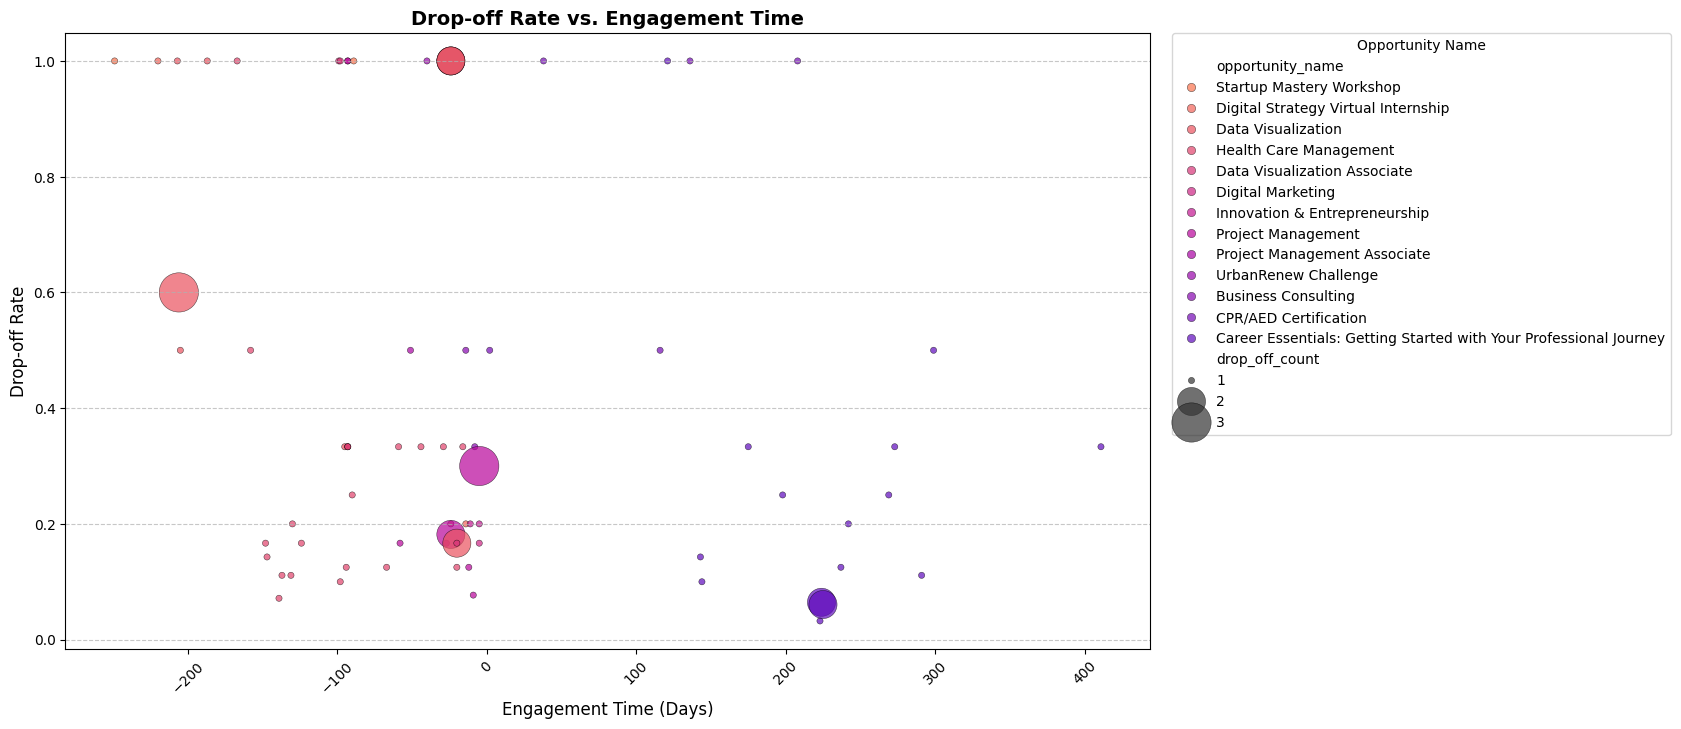

In [41]:
# Generating unique colors for each "opportunity_name"
unique_opportunities = drop_off_summary5["opportunity_name"].nunique()
palette = sns.color_palette(color_palette, n_colors=unique_opportunities)

# Visualization - Bubble Chart
plt.figure(figsize=(14, 8))
bubble = sns.scatterplot(
    data=drop_off_summary5,
    x="engagement_time",
    y="drop_off_rate",
    size="drop_off_count",
    hue="opportunity_name",
    sizes=(20, 800),  # Adjusting bubble sizes
    palette=palette,  # Applying custom palette
    edgecolor="black",
    alpha=0.7  # Transparency
)

# Enhancing plot aesthetics
plt.title("Drop-off Rate vs. Engagement Time", fontsize=14, fontweight="bold")
plt.xlabel("Engagement Time (Days)", fontsize=12)
plt.ylabel("Drop-off Rate", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Improve legend readability
plt.legend(title="Opportunity Name", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

# Show Plot
plt.show()

#### **Insights & Recommendations on Engagement Time vs. Drop-off Rate**

#####  **Key Insights**
1. **High Drop-offs for Long Engagement Times (Delayed Start):**
   - Several opportunities with engagement times of **over 200+ days** (e.g., "Career Essentials" and "CPR/AED Certification") show **consistently high drop-off rates**, indicating learners lose interest when the start date is too far from their application date.

2. **Negative Engagement Times Indicate Late Applications Leading to Drop-offs:**  
   - Opportunities with **negative engagement durations** (e.g., "Startup Mastery Workshop," "Digital Strategy Virtual Internship," "Data Visualization") suggest that **learners applied after the opportunity had already started**.  
   - This misalignment may cause **higher drop-off rates** as learners might feel behind, struggle to catch up, or perceive the opportunity as no longer relevant.  
   - Possible causes include **unclear deadlines, insufficient promotion before the start date, or lack of flexibility in late enrollments**.

3. **Mid-range Engagement Times (30-150 days) Show Mixed Drop-off Patterns:**
   - Some opportunities, such as "Health Care Management" and "Project Management," show a **gradual decrease in drop-offs** as engagement time approaches 50-100 days.
   - However, there are still fluctuations, indicating that **delays beyond 90+ days could still negatively impact retention**.

4. **Certain Programs Have Persistent High Drop-off Rates:**
   - Programs like "Data Visualization," "Business Consulting," and "Innovation & Entrepreneurship" have **frequent high drop-off rates across various engagement times**, suggesting the need for **better engagement strategies**.

---

##### **Recommendations**
1. **Reduce Engagement Time Gaps:**
   - Aim to **minimize the delay** between application and opportunity start dates, ideally keeping it **below 60 days**.
   - Shorter engagement times improve retention and ensure learners remain motivated.

2. **Pre-Engagement Activities to Maintain Interest:**
   - Introduce **interactive pre-start activities** like:
     - Webinars, Q&A sessions, or prep materials.
     - Community engagement (discussion forums, social media groups).
   - These can help retain learners during long wait periods.

3. **Optimize Communication & Touchpoints:**
   - Send **regular updates** to learners with engagement times exceeding 90 days to keep them informed and engaged.
   - Provide **success stories or testimonials** from previous participants to maintain enthusiasm.

4. **Identify and Prioritize Critical Drop-off Points:**
   - Focus on opportunities with the **highest early drop-offs** (negative engagement time cases).
   - Investigate potential **onboarding friction points** or **application process inefficiencies** that may cause learners to disengage before the official start.

5. **Enhance Flexibility in Program Scheduling:**
   - Consider **rolling admissions or flexible start dates** for high-demand opportunities.
   - Avoid **fixed long-term schedules** that require learners to wait several months before starting.

By implementing these strategies, we can significantly reduce drop-offs and improve overall engagement retention!


### Age-Opportunity Name-Drop Off Count

In [42]:
age_opportunity_drop_off_summary = df.groupby(['age_group','opportunity_name'])['drop_off_status'].sum().reset_index()
age_opportunity_drop_off_summary.columns = ['Age Group','Opportunity','Drop-off Count']

In [43]:
# Creating Pivot table for stacked bar chart
pivot_data = age_opportunity_drop_off_summary.pivot(index="Age Group", columns="Opportunity", values="Drop-off Count").fillna(0)
pivot_data.head()

Opportunity,AI Ethics Challenge,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Freelance Mastery workshop,Health Care Management,Innovation & Entrepreneurship,Join a Student Organisation,Jump Start: Developing your Emotional Intelligence,Mental and Physical Health Session,Project Management,Project Management Associate,Slide Geeks: A Presentation Design Competition,Startup Mastery Workshop,UX Redesign Challenge,Upload Your First Year Transcript,UrbanRenew Challenge,Xperience Design Hackathon
Age Group,,,,,,,,,,,,,,,,,,,,,,
Teenagers (≤19),0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Early 20s (20-24),0,2,3,8,3,2,1,2,0,10,1,0,0,0,7,0,0,1,0,0,0,0
Mid 20s (25-29),0,1,1,4,4,3,1,2,0,9,1,0,0,0,3,1,0,1,0,0,1,0
30s (30-39),0,1,0,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
40s (40-49),0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Dropping rows & columns where all values are 0
pivot_data = pivot_data.loc[~(pivot_data.eq(0).all(axis=1))] # for rows
pivot_data = pivot_data.loc[:, ~(pivot_data.eq(0).all(axis=0))] # for columns

In [45]:
# resulted pivot table
pivot_data

Opportunity,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Health Care Management,Innovation & Entrepreneurship,Project Management,Project Management Associate,Startup Mastery Workshop,UrbanRenew Challenge
Age Group,,,,,,,,,,,,,
Teenagers (≤19),0,1,4,0,0,0,0,0,0,0,0,0,0
Early 20s (20-24),2,3,8,3,2,1,2,10,1,7,0,1,0
Mid 20s (25-29),1,1,4,4,3,1,2,9,1,3,1,1,1
30s (30-39),1,0,1,3,0,0,0,0,1,0,0,0,0
40s (40-49),0,0,0,0,0,0,0,1,0,0,0,0,0


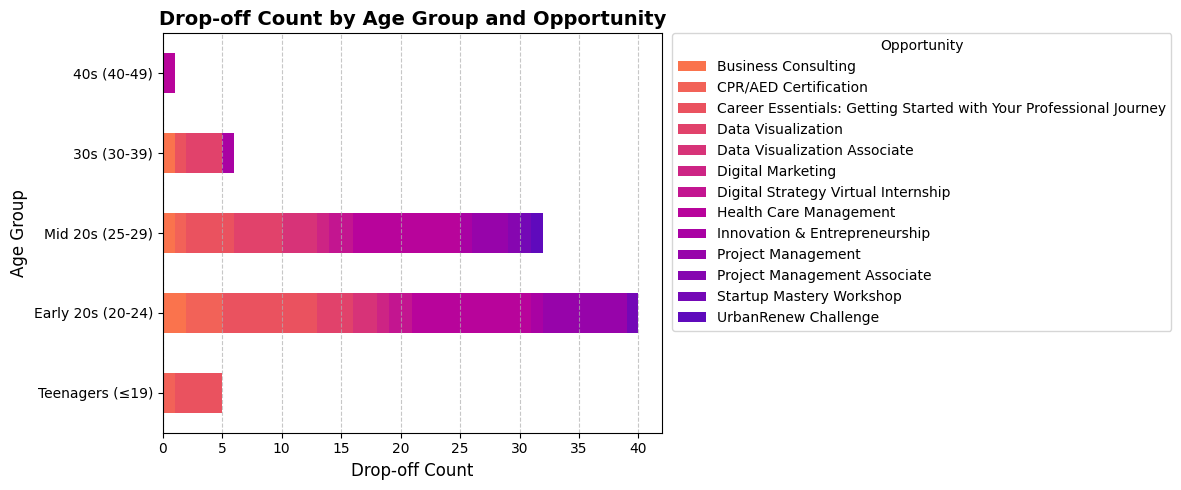

In [46]:
# Adjustting number of colors dynamically based on the number of categories
num_categories = pivot_data.shape[1]  # Number of stacked bars (Opportunity categories)
colormap = sns.color_palette(color_palette, n_colors=num_categories)

# Creating Stacked Bar Chart
pivot_data.plot(kind="barh", stacked=True, figsize=(12, 5), color=colormap)

# Enhancing Plot Aesthetics
plt.title("Drop-off Count by Age Group and Opportunity", fontsize=14, fontweight="bold")
plt.xlabel("Drop-off Count", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Improve legend readability
plt.legend(title="Opportunity", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()

#### **Insights & Recommendations: Age Group vs. Opportunity Drop-Off Analysis**

##### **Insights:**
1. **Higher Drop-Offs in Early 20s (20-24 Age Group)**  
   - The **early 20s group** experiences the highest drop-off rates across almost all opportunities, particularly in **"Career Essentials," "Health Care Management," and "Project Management."**  
   - This could indicate **mismatched expectations, workload challenges, or lack of engagement strategies tailored to this age group.**  

2. **Teenagers (≤19) Show Minimal Drop-Offs but Some Challenges**  
   - The **"Career Essentials" program has the most drop-offs for teenagers**, suggesting **difficulty in adapting to professional journey-based content.**  
   - The **"CPR/AED Certification" program also has drop-offs**, possibly due to **course difficulty or certification requirements.**  

3. **Mid-20s (25-29) Experience Notable Drop-Offs in Data-Driven Programs**  
   - The **"Data Visualization" and "Data Visualization Associate" opportunities see more drop-offs in this age group.**  
   - This may point to **a gap in prerequisite skills or time commitments conflicting with their professional responsibilities.**  

4. **Older Age Groups (30+) Have Minimal Drop-Offs**  
   - **Drop-offs significantly decline beyond the 30s**, with almost **no drop-offs in the 40s group except for one in "Health Care Management."**  
   - This could indicate **higher commitment levels or selective enrollment among older participants.**  

##### **Recommendations:**
1. **Enhance Engagement Strategies for Early 20s Group**  
   - Provide **pre-start orientations, better expectation-setting, and more engaging content delivery** to **reduce drop-offs in key programs.**  
   - Consider **mentorship or peer-support systems** to help this age group stay engaged.  

2. **Adapt Content for Teenagers**  
   - Simplify and break down **career-related content** in programs like **"Career Essentials"** to make it more accessible.  
   - Provide **interactive and gamified elements** to enhance engagement.  

3. **Address Skill Gaps in Data-Focused Opportunities for Mid-20s**  
   - Introduce **beginner-friendly versions or preparatory modules** before "Data Visualization" programs.  
   - Offer **flexible pacing options** for learners balancing work and study.  

4. **Expand Opportunities for Older Age Groups**  
   - Since older learners show **high commitment and low drop-offs**, consider **targeting more advanced or leadership-oriented programs** for this audience.  

5. **Improve Communication on Time Commitment & Expectations**  
   - Clearly outline **course difficulty, time requirements, and expected skills** during the application process to minimize mismatched expectations.  
   - Provide **trial content or short introductory sessions** to help learners assess fit before enrolling.  


### Age Group-wise Drop-off Rate

In [47]:
# Age group-wise drop-off rate
age_dropoffs = df.groupby("age_group")["drop_off_status"].mean().reset_index()
age_dropoffs.columns = ["Age Group", "Average Drop-off Rate"]

In [48]:
# result
print(age_dropoffs)

            Age Group  Average Drop-off Rate
0     Teenagers (≤19)               0.011390
1   Early 20s (20-24)               0.009112
2     Mid 20s (25-29)               0.011457
3         30s (30-39)               0.007692
4         40s (40-49)               0.008621
5  50+ (50 and above)               0.000000


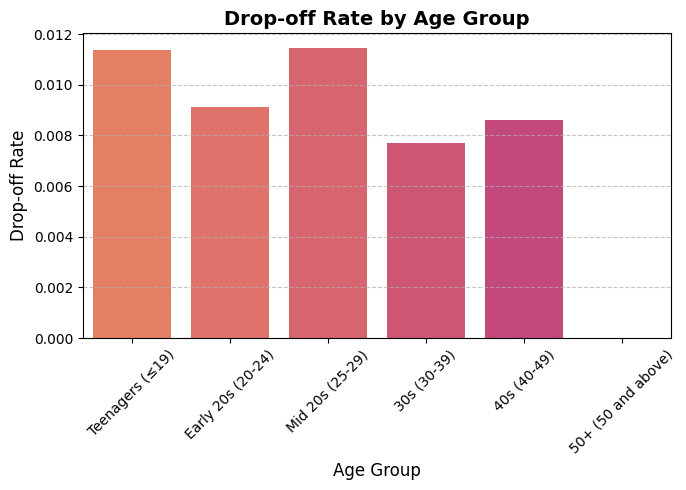

In [49]:
# Ensuring the palette matches the number of Age Groups
num_age_groups = age_dropoffs["Age Group"].nunique()
palette = sns.color_palette(color_palette, n_colors=num_age_groups)

# Visualization
fig, ax = plt.subplots(figsize=(7, 5))

# Drop-off rate barplot with custom colors
sns.barplot(data=age_dropoffs, x="Age Group", y="Average Drop-off Rate", ax=ax, palette=palette)

# Enhancing plot aesthetics
ax.set_title("Drop-off Rate by Age Group", fontsize=14, fontweight="bold")
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Drop-off Rate", fontsize=12)
ax.tick_params(axis="x", rotation=45, labelsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Insights & Recommendations: Age Group-Wise Drop-Off Rate Analysis**

##### **Insights:**

1. **Teenagers (≤19) and Mid 20s (25-29) Have the Highest Drop-Off Rates**  
   - The **highest drop-off rates** are seen among **Teenagers (1.14%) and Mid 20s (1.145%)** groups.  
   - This suggests that **younger learners may struggle with course expectations, complexity, or engagement.**  

2. **Early 20s (20-24) Show a Slightly Lower Drop-Off Rate**  
   - Despite having the highest drop-off count in previous analyses, their **drop-off rate (0.91%) is lower than teenagers and mid-20s.**  
   - This indicates that while drop-offs are frequent, they may be spread across a larger group of participants.  

3. **Drop-Off Rates Decline in Older Age Groups (30s and Above)**  
   - **Drop-off rates decrease as age increases, with the lowest in the 50+ group (0.00%).**  
   - This suggests **higher commitment levels, better alignment with professional needs, or stronger motivation among older learners.**  

##### **Recommendations:**

1. **Enhance Support for Teenagers & Mid-20s Learners**  
   - Provide **structured onboarding, interactive learning experiences, and mentorship opportunities** to retain younger learners.  
   - Offer **preparatory courses or skill-building sessions** before diving into complex content.  

2. **Reassess Course Design for Younger Participants**  
   - Simplify or **modularize content** for teenagers and mid-20s learners to **reduce cognitive overload.**  
   - Introduce **gamification and short, engaging learning formats** to improve retention.  

3. **Encourage Long-Term Engagement for Early 20s Learners**  
   - Since this age group has **moderate drop-off rates but high overall drop-off counts**, introduce **flexible pacing options** and **check-in mechanisms** to keep them engaged.  
   - Offer **peer learning communities** to improve retention.  

4. **Leverage High Retention in Older Age Groups**  
   - Expand offerings targeting **professionals in their 30s, 40s, and 50+** with **advanced, leadership-oriented programs.**  
   - Promote networking and career advancement opportunities to maintain engagement.  

5. **Improve Expectation-Setting & Commitment Strategies**  
   - Clearly **define course requirements, expected workload, and time commitments** before enrollment.  
   - Use **trial modules or pre-course assessments** to ensure better alignment with learners' needs and capabilities.  


### Gender-wise Drop-offs Rate

In [50]:
# Gender-wise drop-off rate
gender_dropoffs = df.groupby("gender")["drop_off_status"].mean().reset_index()
gender_dropoffs.columns = ["Gender", "Average Drop-off Rate"]

In [51]:
# result
print(gender_dropoffs)

                  Gender  Average Drop-off Rate
0  Don't want to specify               0.133333
1                 Female               0.010253
2                   Male               0.009198
3                  Other               0.000000


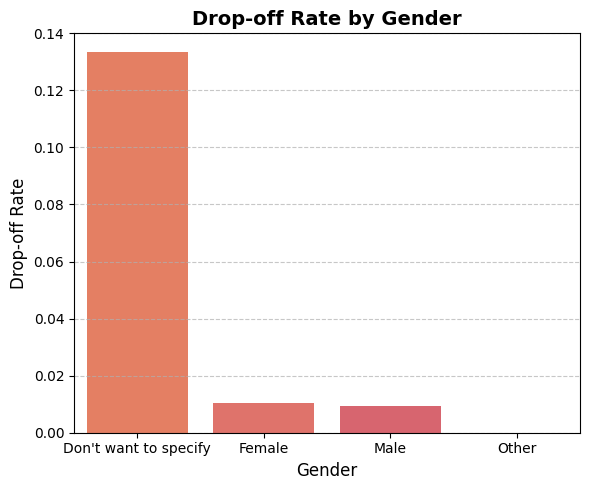

In [52]:
# Checking number of unique categories
num_categories = gender_dropoffs["Gender"].nunique()

# Assiging a subset of the palette dynamically
palette = sns.color_palette(color_palette[:num_categories])

# Visualization
fig, ax = plt.subplots(figsize=(6, 5))

# Drop-off rate barplot with your 13-color palette
sns.barplot(data=gender_dropoffs, x="Gender", y="Average Drop-off Rate", ax=ax, palette=palette)

# Enhancing plot aesthetics
ax.set_title("Drop-off Rate by Gender", fontsize=14, fontweight="bold")
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Drop-off Rate", fontsize=12)
ax.tick_params(axis="x", labelsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)  # Adding light grid for better readability

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Insights & Recommendations: Gender-Wise Drop-Off Rate Analysis**

#### **Insights:**

1. **Highest Drop-Off Rate Among "Don't Want to Specify" Group**  
   - This group has a significantly higher **drop-off rate (13.33%)** compared to others.  
   - Possible reasons could be **lack of inclusivity, discomfort with the learning environment, or external personal factors.**  

2. **Slightly Higher Drop-Off Rate Among Female Learners (1.03%) Compared to Males (0.92%)**  
   - Female participants show a **marginally higher drop-off rate** than male learners.  
   - Potential reasons may include **work-life balance challenges, lower engagement levels, or course relevance.**  

3. **Male Learners Have a Slightly Lower Drop-Off Rate**  
   - With a **drop-off rate of 0.92%**, male learners appear to **stay more engaged** on average.  
   - This suggests better alignment with their expectations or learning needs.  

4. **Zero Drop-Offs in the "Other" Gender Category**  
   - This might indicate **either a very small sample size or strong commitment among these learners.**  
   - Further analysis is required to confirm trends.  

##### **Recommendations:**

1. **Investigate High Drop-Off Rate for "Don't Want to Specify" Group**  
   - Conduct **surveys or feedback sessions** to understand their concerns.  
   - Ensure the **platform, content, and community are inclusive and welcoming.**  

2. **Support Female Learners to Reduce Drop-Offs**  
   - Offer **flexible scheduling options** to accommodate diverse commitments.  
   - Introduce **mentorship programs and networking opportunities** to enhance engagement.  
   - Highlight **success stories of female learners** to boost motivation.  

3. **Maintain Engagement Among Male Learners**  
   - Identify and replicate the **factors contributing to their lower drop-off rate.**  
   - Utilize **data-driven personalization** to sustain their learning interest.  

4. **Ensure Inclusivity Across All Gender Groups**  
   - Promote **gender-neutral learning environments and diverse representation in course materials.**  
   - Offer **customized engagement strategies** based on learner preferences.  

5. **Monitor and Expand Support for the "Other" Gender Category**  
   - Ensure **inclusivity and accessibility** while gathering more data to assess long-term trends.  
   - Encourage participation by **creating safe spaces and communities** for diverse learners.  


### Top & Bottom 5 countries based on drop-off rates

In [53]:
# Country-wise drop-off rate
country_dropoffs = df.groupby("country")["drop_off_status"].mean().reset_index()
country_dropoffs.columns = ["Country", "Average Drop-off Rate"]

In [54]:
# dataframe
print(country_dropoffs.head())

          Country  Average Drop-off Rate
0     Afghanistan                    0.0
1         Algeria                    0.0
2  American Samoa                    0.0
3       Australia                    0.0
4      Azerbaijan                    0.0


In [55]:
# Top 5 countries based on drop-off rate
top_5 = country_dropoffs.nlargest(5, "Average Drop-off Rate")

# Bottom 5 countries based on signups
bottom_5 = country_dropoffs.nsmallest(5, "Average Drop-off Rate")

In [56]:
# result tables
print("Top 5 Countries by Average Drop-off Rate:")
print(top_5)
print("\nBottom 5 Countries by Average Drop-off Rate:")
print(bottom_5)

Top 5 Countries by Average Drop-off Rate:
           Country  Average Drop-off Rate
9           Brazil               0.500000
6          Belarus               0.333333
68        Zimbabwe               0.125000
61  United Kingdom               0.095238
48    Sierra Leone               0.090909

Bottom 5 Countries by Average Drop-off Rate:
          Country  Average Drop-off Rate
0     Afghanistan                    0.0
1         Algeria                    0.0
2  American Samoa                    0.0
3       Australia                    0.0
4      Azerbaijan                    0.0


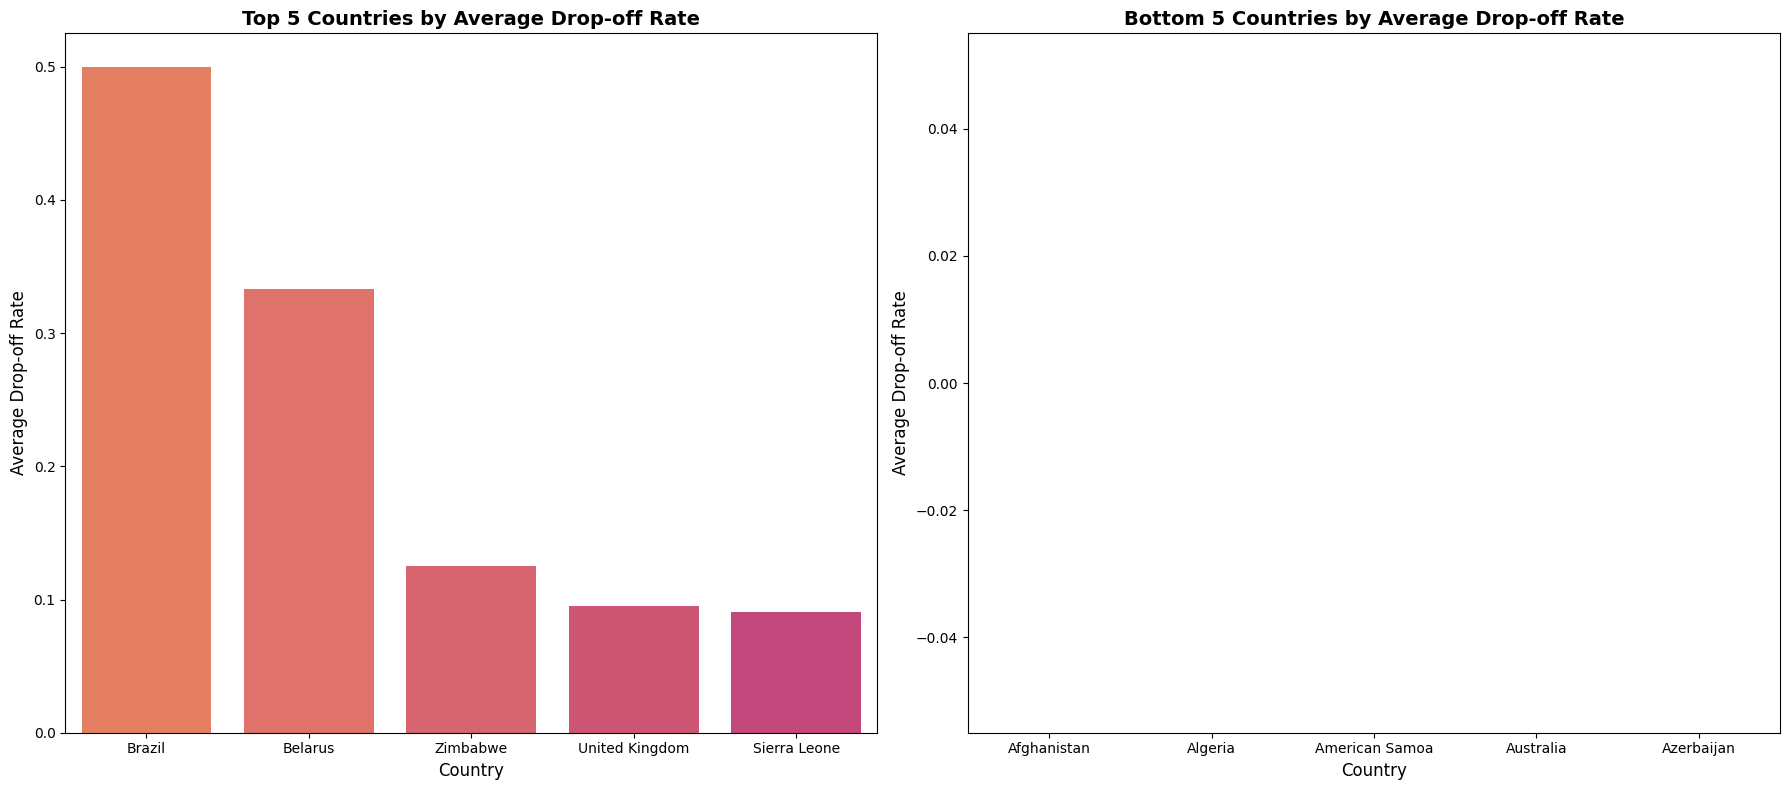

In [57]:
# Determining unique country counts in each dataset
num_top_countries = top_5["Country"].nunique()
num_bottom_countries = bottom_5["Country"].nunique()

# Assiging colors dynamically based on the number of unique categories
palette_top = sns.color_palette(color_palette[:num_top_countries])
palette_bottom = sns.color_palette(color_palette[:num_bottom_countries])

# Creating a figure with 2 subplots in a single row
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 5 Countries - Drop-off Rate
sns.barplot(data=top_5, x="Country", y="Average Drop-off Rate", ax=axes[0], palette=palette_top)
axes[0].set_title("Top 5 Countries by Average Drop-off Rate", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Country", fontsize=12)
axes[0].set_ylabel("Average Drop-off Rate", fontsize=12)

# Bottom 5 Countries - Drop-off Rate
sns.barplot(data=bottom_5, x="Country", y="Average Drop-off Rate", ax=axes[1], palette=palette_bottom)
axes[1].set_title("Bottom 5 Countries by Average Drop-off Rate", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Country", fontsize=12)
axes[1].set_ylabel("Average Drop-off Rate", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

#### **Insights & Recommendations: Country-Wise Drop-Off Rate Analysis**

##### **Insights:**

**1. High Drop-Off Rates in Brazil and Belarus**
   - **Brazil (50%) and Belarus (33.3%)** show the highest drop-off rates.  
   - Possible reasons:
     - **Language barriers** affecting comprehension.
     - **Limited internet accessibility** or connectivity issues.
     - **Mismatch between course content and local industry needs.**

**2. Moderate Drop-Off Rates in Zimbabwe, UK, and Sierra Leone**
   - **Zimbabwe (12.5%), United Kingdom (9.5%), and Sierra Leone (9.1%)** exhibit **relatively lower drop-offs** but still require attention.  
   - Possible reasons:
     - **Economic constraints** leading to financial struggles in accessing learning resources.
     - **Competing educational or work commitments.**
     - **Lack of awareness of available support services.**

**3. Zero Drop-Offs in Afghanistan, Algeria, American Samoa, Australia, and Azerbaijan**
   - These countries report **no drop-offs (0%)**, indicating:
     - **Highly engaged learners** with strong motivation.
     - **Better alignment of opportunities with learner expectations.**
     - **Potentially small sample sizes**, which may not reflect broader trends.

##### **Recommendations:**

**1. Address High Drop-Off Countries with Localized Support**
   - **Brazil & Belarus:**  
     - Offer **localized content or subtitles** to mitigate language barriers.  
     - Improve **technical support for internet accessibility challenges.**  
     - Align courses with **regional job market demands.**  

   - **Zimbabwe, UK & Sierra Leone:**  
     - Provide **financial aid or scholarships** to support learners from economically constrained backgrounds.  
     - Promote **flexible learning options** to accommodate work-study balance.  
     - Enhance **mentorship and peer-learning programs** to boost engagement.

**2. Investigate & Learn from Low Drop-Off Countries**
   - **Analyze engagement patterns** in Afghanistan, Algeria, and Australia to understand **what drives retention.**  
   - **Identify best practices** that can be applied to high-drop-off countries.  

**3. Strengthen Global Engagement Strategies**
   - Introduce **country-specific learning communities** to foster interaction.  
   - Use **data-driven insights** to adjust **marketing and communication strategies** for different regions.  
   - **Partner with local institutions** to enhance credibility and accessibility.  

**4. Improve Learning Experience with Cultural Relevance**
   - Adapt courses to **regional interests and job market needs.**  
   - Offer **country-specific career guidance** to showcase relevance in different industries.  
   - Encourage **localized success stories** to increase motivation among learners.  


### Top & Bottom 5 Institutions by drop-off rates

In [58]:
# Institution-wise drop-off rate
inst_dropoffs = df.groupby("institution_name")["drop_off_status"].mean().reset_index()
inst_dropoffs.columns = ["Institution", "Average Drop-off Rate"]

In [59]:
# dataframe
print(inst_dropoffs.head())

                      Institution  Average Drop-off Rate
0                        AAMUSTED                  0.000
1               ABC Inter College                  0.125
2  ABN and PRR College of Science                  0.000
3         ACE Engineering College                  0.000
4                     ACP college                  0.000


In [60]:
# Top 5 institutions based on signups
top_5_institutions = inst_dropoffs.nlargest(5, "Average Drop-off Rate")

# Bottom 5 institutions based on signups
bottom_5_institutions = inst_dropoffs.nsmallest(5, "Average Drop-off Rate")

# Displaying the result tables
print("Top 5 Institutions by Average Drop-off Rate:")
print(top_5_institutions)
print("\nBottom 5 Institutions by Average Drop-off Rate:")
print(bottom_5_institutions)

Top 5 Institutions by Average Drop-off Rate:
                                           Institution  Average Drop-off Rate
28               Achievers University  Owo  Ondo State                    1.0
127                           Banaras Hindu University                    1.0
478                                  Gomel High School                    1.0
575                        IFET COLLEGE OF ENGINEERING                    1.0
576  IFSC - Instituto Federal de EducaÃÂ§ÃÂ£o  Ci...                    1.0

Bottom 5 Institutions by Average Drop-off Rate:
                      Institution  Average Drop-off Rate
0                        AAMUSTED                    0.0
2  ABN and PRR College of Science                    0.0
3         ACE Engineering College                    0.0
4                     ACP college                    0.0
5                             AEC                    0.0


In [61]:
# Applying text wrapping for long institution names
top_5_institutions["Institution"] = top_5_institutions["Institution"].apply(lambda x: "\n".join(textwrap.wrap(str(x), width=20)))
bottom_5_institutions["Institution"] = bottom_5_institutions["Institution"].apply(lambda x: "\n".join(textwrap.wrap(str(x), width=20)))

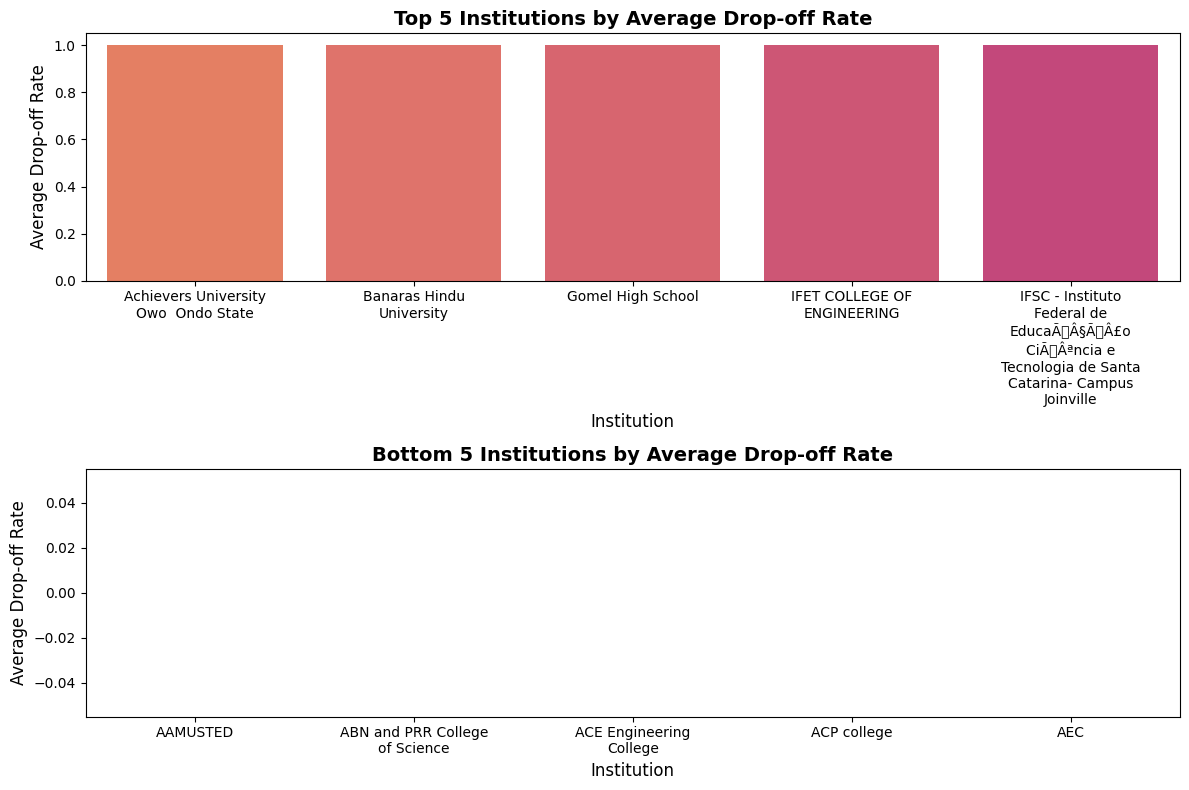

In [62]:
# Determining unique institutions count in each dataset
num_top_institutions = top_5_institutions["Institution"].nunique()
num_bottom_institutions = bottom_5_institutions["Institution"].nunique()

# Assigning colors dynamically based on the number of unique categories
palette_top = sns.color_palette(color_palette[:num_top_institutions])
palette_bottom = sns.color_palette(color_palette[:num_bottom_institutions])

# Creating a figure with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # 2 rows, 1 column

# Top 5 Institutions - Drop-off Rate
sns.barplot(data=top_5_institutions, x="Institution", y="Average Drop-off Rate", ax=axes[0], palette=palette_top)
axes[0].set_title("Top 5 Institutions by Average Drop-off Rate", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Institution", fontsize=12)
axes[0].set_ylabel("Average Drop-off Rate", fontsize=12)

# Bottom 5 Institutions - Drop-off Rate
sns.barplot(data=bottom_5_institutions, x="Institution", y="Average Drop-off Rate", ax=axes[1], palette=palette_bottom)
axes[1].set_title("Bottom 5 Institutions by Average Drop-off Rate", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Institution", fontsize=12)
axes[1].set_ylabel("Average Drop-off Rate", fontsize=12)

# Adjustting layout for better spacing
plt.tight_layout()
plt.show()

#### **Insights & Recommendations: Institution-Wise Drop-Off Rate Analysis**

##### **Insights:**

**1. Extremely High Drop-Off Rates (100%) in Certain Institutions**
   - Institutions such as:
     - **Achievers University, Owo, Ondo State**
     - **Banaras Hindu University**
     - **Gomel High School**
     - **IFET College of Engineering**
     - **IFSC - Instituto Federal de Educação, Ciência e Tecnologia**
   - These institutions have a **100% drop-off rate**, indicating that **every enrolled learner has dropped out** from the opportunities.  
   - Possible reasons:
     - **Lack of awareness or understanding** of the opportunity’s relevance.  
     - **Institutional policies** or rigid academic schedules conflicting with program participation.  
     - **Technical difficulties** (e.g., access issues, platform compatibility).  

**2. Zero Drop-Off Rates in Some Institutions**
   - Institutions such as:
     - **AAMUSTED**
     - **ABN and PRR College of Science**
     - **ACE Engineering College**
     - **ACP College**
     - **AEC**
   - These institutions report **no drop-offs (0%)**, suggesting:
     - **Highly engaged learners** with strong motivation.
     - **Better alignment of programs with student interests.**
     - **Effective institutional support and awareness campaigns.**

##### **Recommendations:**
**1. Investigate High Drop-Off Institutions**
   - Conduct **student feedback surveys** to understand drop-off reasons.
   - Improve **awareness campaigns** to clarify the benefits and relevance of the opportunities.
   - Collaborate with institutional stakeholders to **align program timelines with academic schedules.**

**2. Leverage Best Practices from Low Drop-Off Institutions**
   - **Identify engagement strategies** used by institutions with 0% drop-off rates.
   - Implement **peer mentorship and structured onboarding programs** for high-drop-off institutions.
   - Highlight **successful student testimonials** to boost motivation.

**3. Improve Accessibility & Technical Support**
   - Ensure seamless **platform compatibility** and mobile access.
   - Provide **localized support** to institutions with high drop-off rates.
   - Implement **automated reminders and progress tracking** to enhance engagement.

**4. Strengthen Institutional Partnerships**
   - Work closely with high-drop-off institutions to **create customized learning pathways** for their students.
   - Offer **faculty-led guidance sessions** to help students see the value in completing opportunities.
   - Provide **institution-specific data insights** to help administrators identify areas for improvement.


### Top & Bottom 5 Current/Intended Major by drop-off rates

In [63]:
# Major-wise drop-off rate
major_dropoffs = df.groupby("current/intended_major")["drop_off_status"].mean().reset_index()
major_dropoffs.columns = ["Major", "Average Drop-off Rate"]

In [64]:
# dataframe
print(major_dropoffs.head())

                    Major  Average Drop-off Rate
0             Accountancy                    0.0
1              Accounting                    0.0
2  Accounting And Finance                    0.0
3   Actuarial Mathematics                    0.0
4       Actuarial Science                    0.0


In [65]:
# Top 5 majors based on signups
top_5_majors = major_dropoffs.nlargest(5, "Average Drop-off Rate")

# Bottom 5 majors based on signups
bottom_5_majors = major_dropoffs.nsmallest(5, "Average Drop-off Rate")

# Displaying the result tables
print("Top 5 Majors by Average Drop-off Rate:")
print(top_5_majors)
print("\nBottom 5 Majors by Average Drop-off Rate:")
print(bottom_5_majors)

Top 5 Majors by Average Drop-off Rate:
                                     Major  Average Drop-off Rate
204   Human Development And Family Science               1.000000
131                      Digital Marketing               0.100000
96                                Computer               0.090909
218  Information Technology And Management               0.087719
126                     Data Visualization               0.076923

Bottom 5 Majors by Average Drop-off Rate:
                    Major  Average Drop-off Rate
0             Accountancy                    0.0
1              Accounting                    0.0
2  Accounting And Finance                    0.0
3   Actuarial Mathematics                    0.0
4       Actuarial Science                    0.0


In [66]:
# Applying text wrapping for long major names
top_5_majors["Major"] = top_5_majors["Major"].apply(lambda x: "\n".join(textwrap.wrap(str(x), width=20)))
bottom_5_majors["Major"] = bottom_5_majors["Major"].apply(lambda x: "\n".join(textwrap.wrap(str(x), width=20)))

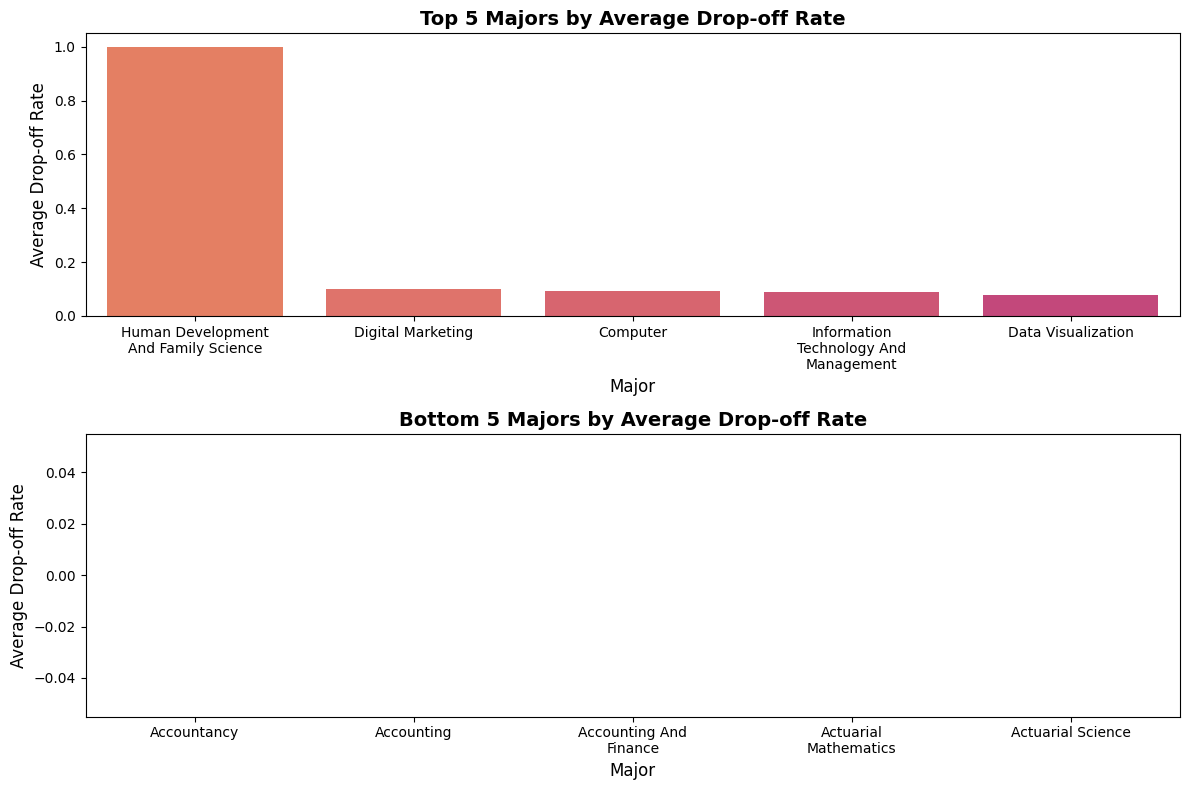

In [67]:
# Determining unique majors count in each dataset
num_top_majors = top_5_majors["Major"].nunique()
num_bottom_majors = bottom_5_majors["Major"].nunique()

# Assigning colors dynamically based on the number of unique categories
palette_top = sns.color_palette(color_palette[:num_top_majors])
palette_bottom = sns.color_palette(color_palette[:num_bottom_majors])

# Creating a figure with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # 2 rows, 1 column

# Top 5 Majors - Drop-off Rate
sns.barplot(data=top_5_majors, x="Major", y="Average Drop-off Rate", ax=axes[0], palette=palette_top)
axes[0].set_title("Top 5 Majors by Average Drop-off Rate", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Major", fontsize=12)
axes[0].set_ylabel("Average Drop-off Rate", fontsize=12)

# Bottom 5 Majors - Drop-off Rate
sns.barplot(data=bottom_5_majors, x="Major", y="Average Drop-off Rate", ax=axes[1], palette=palette_bottom)
axes[1].set_title("Bottom 5 Majors by Average Drop-off Rate", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Major", fontsize=12)
axes[1].set_ylabel("Average Drop-off Rate", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Insights & Recommendations: Major-Wise Drop-Off Rate Analysis**

##### **Insights:**

**1. Human Development and Family Science Shows 100% Drop-Off**
   - **All students from this major dropped out**, indicating a **mismatch** between opportunity offerings and their academic/career interests.
   - Possible reasons:
     - Lack of opportunities aligned with **social sciences or human development**.
     - Students may not perceive the offered programs as **relevant or beneficial**.
     - Potential **schedule conflicts** with coursework or other commitments.

**2. Other High Drop-Off Majors Have Moderate Drop-Off Rates (~7-10%)**
   - **Digital Marketing (10%)**, **Computer (9%)**, **Information Technology & Management (8.7%)**, and **Data Visualization (7.7%)** show moderate drop-off rates.
   - Potential reasons:
     - Overlapping commitments with **technical coursework or projects**.
     - Lack of **real-world application or industry alignment** in the program.

**3. Zero Drop-Off in Accounting & Actuarial Fields**
   - **Majors like Accountancy, Accounting, Finance, and Actuarial Science have 0% drop-off rates**, indicating:
     - **Strong relevance of opportunities** to career goals.
     - **Well-structured learning pathways** that keep students engaged.
     - **Higher motivation levels** in students from finance-related fields.

##### **Recommendations:**

**1. Improve Opportunity Relevance for High Drop-Off Majors**
   - **For Human Development & Family Science:**
     - Introduce **social impact projects, behavioral analytics roles, or family policy internships**.
     - Offer **hybrid or flexible engagements** to accommodate academic schedules.

   - **For Digital Marketing, IT & Computer Science Majors:**
     - Develop **real-world capstone projects** with industry mentors.
     - Integrate **micro-courses with certifications** to increase perceived value.

**2. Identify and Apply Engagement Strategies from Low Drop-Off Majors**
   - Investigate why **accounting and actuarial majors** have **higher retention**.
   - Implement similar **structured learning, incentives, or mentorship** models for high drop-off majors.

**3. Strengthen Pre-Enrollment Clarity & Guidance**
   - Provide **clearer program descriptions and expected outcomes** before enrollment.
   - Offer **pre-application counseling** to help students understand how opportunities align with their field.
   - Introduce **trial sessions** to increase commitment before full enrollment.

**4. Reduce Scheduling Conflicts & Improve Program Flexibility**
   - Allow **asynchronous learning modules** for students with high academic workloads.
   - Offer **short-term, high-impact learning experiences** instead of long-term commitments.
   - Develop **industry-led boot camps** that combine technical skills with practical application.

By implementing these changes, engagement can be improved while reducing drop-offs in high-risk majors.

---

In [68]:
df.dtypes

,0
learner_signup_datetime,object
opportunity_id,object
opportunity_name,object
opportunity_category,object
opportunity_end_date,object
first_name,object
date_of_birth,object
gender,object
country,object
institution_name,object


##### Changing all date columns data type to datetime datatype

In [69]:
date_columns = ['learner_signup_datetime','opportunity_end_date','date_of_birth','entry_created_at','apply_date','opportunity_start_date']

In [70]:
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [71]:
df.dtypes

,0
learner_signup_datetime,datetime64[ns]
opportunity_id,object
opportunity_name,object
opportunity_category,object
opportunity_end_date,datetime64[ns]
first_name,object
date_of_birth,datetime64[ns]
gender,object
country,object
institution_name,object


In [72]:
# changing status_code column dtype
df['status_code'] = df['status_code'].astype(str)

### Drop-off trend by Application Date

In [73]:
# Extracting Year-Month
df["Apply Year-Month"] = df["apply_date"].dt.to_period("M")

In [74]:
# Grouping by 'Apply Year-Month' and calculating Drop-off Rate
monthly_drop_off = df.groupby("Apply Year-Month")["drop_off_status"].mean().reset_index()

In [75]:
# sorting values by Apply Year-Month column
monthly_drop_off = monthly_drop_off.sort_values("Apply Year-Month")

In [76]:
monthly_drop_off.head() # result dataframe

,Apply Year-Month,drop_off_status
0,2022-10,0.0
1,2022-11,0.0
2,2022-12,0.0
3,2023-01,0.0
4,2023-02,0.0


In [77]:
# changing data type to string of Apply Year-Month column
monthly_drop_off["Apply Year-Month"] = monthly_drop_off["Apply Year-Month"].astype(str)

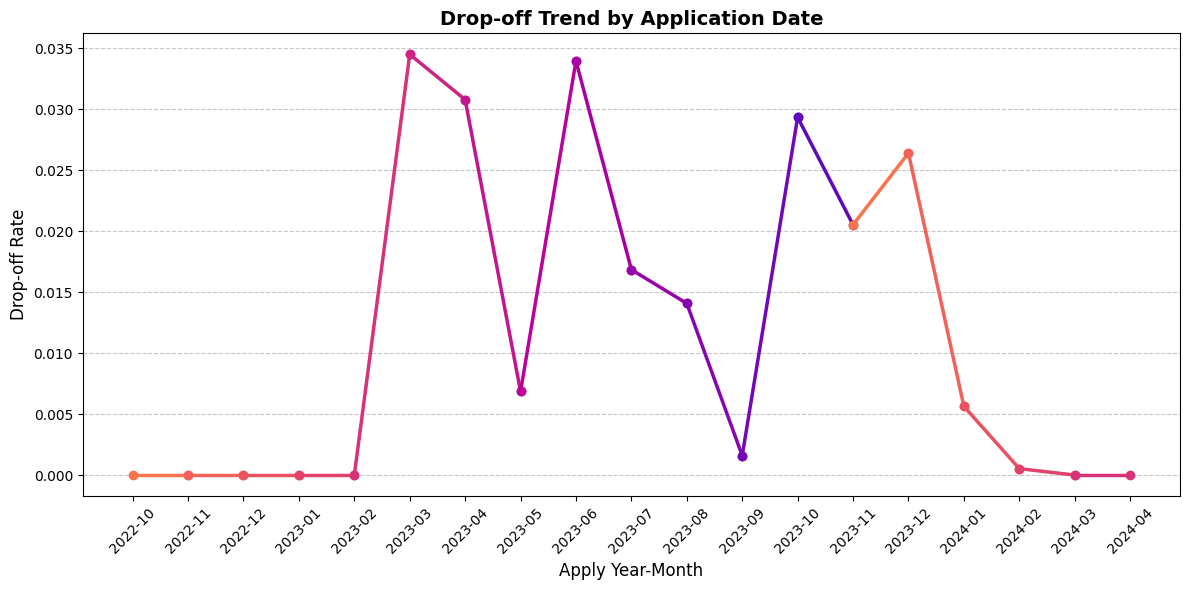

In [78]:
# Adjustting the color dynamically based on the number of data points
num_points = len(monthly_drop_off)
colors = sns.color_palette(color_palette, n_colors=num_points)  # Using your custom 13-color palette

# Visualization
plt.figure(figsize=(12, 6))

# Applying gradient effect using color variation for each point
for i in range(num_points - 1):
    plt.plot(
        monthly_drop_off["Apply Year-Month"].iloc[i:i+2],
        monthly_drop_off["drop_off_status"].iloc[i:i+2],
        marker="o", color=colors[i], linewidth=2.5
    )

# Enhancing plot aesthetics
plt.title("Drop-off Trend by Application Date", fontsize=14, fontweight="bold")
plt.xlabel("Apply Year-Month", fontsize=12)
plt.ylabel("Drop-off Rate", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjustting layout for better spacing
plt.tight_layout()

# Show Plot
plt.show()

#### **Insights & Recommendations: Drop-Off Trend by Application Date**

##### **Insights:**

**1. No Drop-Offs for Applications Before March 2023**
   - Applicants who applied between **October 2022 and February 2023** had a **0% drop-off rate**.
   - Possible reasons:
     - Fewer enrollments or delayed program start dates.
     - Effective pre-engagement strategies during early phases.

**2. Highest Drop-Off Rates in March, April, and June 2023**
   - **3.45% of applicants who applied in March 2023 dropped off**.
   - **3.08% of applicants who applied in April 2023 dropped off**.
   - **3.39% of applicants who applied in June 2023 dropped off**.
   - Potential causes:
     - Lack of clear onboarding or engagement after application.
     - Overlapping with academic or professional commitments.
     - High expectations not aligning with program structure.

**3. Lower Drop-Off Rates in Late 2023**
   - Drop-off rates started declining:
     - **July 2023: 1.68% drop-off**
     - **August 2023: 1.41% drop-off**
     - **September 2023: 0.16% drop-off (lowest)**
   - Possible reasons:
     - Improved engagement strategies.
     - Better expectation setting at the time of application.
     - Stronger peer or mentorship support.

**4. Minimal Drop-Offs in 2024**
   - **January 2024: 0.56% drop-off**
   - **February 2024: 0.05% drop-off**
   - **March & April 2024: 0% drop-off**
   - Indicates:
     - Successful retention strategies.
     - More selective or better-prepared applicants.
     - Effective post-application communication.

##### **Recommendations:**

**1. Strengthen Engagement Strategies for High Drop-Off Periods**
   - **March, April, and June applicants require stronger onboarding efforts**:
     - Provide **pre-application guidance and expectation-setting webinars**.
     - Improve **personalized communication immediately after applying**.
     - Offer **early engagement activities (workshops, mentor sessions, Q&A forums)**.

**2. Align Opportunity Launch with Student Availability**
   - Avoid launching new programs during months with historically high drop-offs.
   - **Survey applicants on preferred start dates** to align with availability.
   - Offer **flexible start options** for better participation.

**3. Investigate Early 2023 Drop-Off Spikes**
   - Conduct **exit surveys** for applicants who dropped off.
   - Identify specific reasons behind disengagement post-application.
   - Strengthen **first-week engagement activities** to improve retention.

**4. Maintain and Scale Successful Late 2023 Strategies**
   - Continue strategies that led to lower drop-offs in **September 2023 – February 2024**.
   - Expand **mentorship programs and peer engagement initiatives**.
   - Leverage **automated follow-ups and personalized outreach**.

By reinforcing engagement in high-risk months and scaling successful strategies, drop-offs can be further reduced across all application periods.


### Drop-off trend by Opportunity start date

In [79]:
# Extracting Year-Month
df["Opportunity Start Year-Month"] = df["opportunity_start_date"].dt.to_period("M")

In [80]:
# Grouping by 'Apply Year-Month' and calculate Drop-off Rate
monthly_drop_off2 = df.groupby("Opportunity Start Year-Month")["drop_off_status"].mean().reset_index()

In [81]:
# sorting by "Opportunity Start Year-Month" column
monthly_drop_off2 = monthly_drop_off2.sort_values("Opportunity Start Year-Month")

In [82]:
# changing data type to string of Opportunity Year-Month column
monthly_drop_off2["Opportunity Start Year-Month"] = monthly_drop_off2["Opportunity Start Year-Month"].astype(str)

In [83]:
monthly_drop_off2 # resultant dataframe

,Opportunity Start Year-Month,drop_off_status
0,2022-11,0.012602
1,2023-03,0.014706
2,2023-06,0.000000
3,2023-08,0.000000
4,2024-01,0.009880
5,2024-02,0.006276
6,2024-03,0.005484
7,2024-04,0.010870
8,2024-05,0.000000


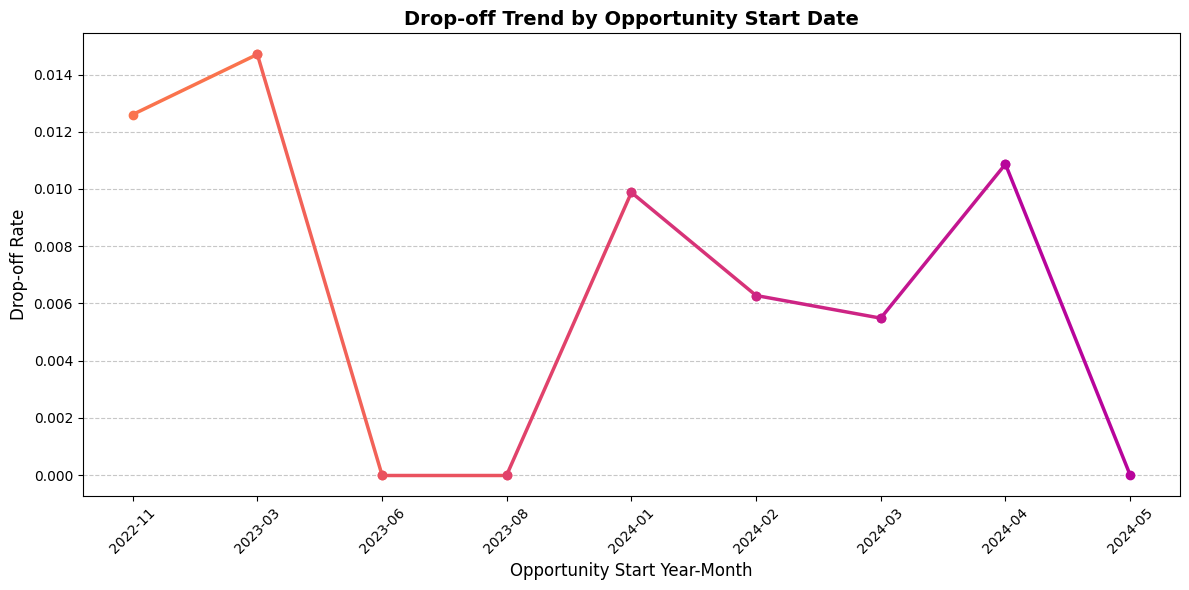

In [84]:
# Adjustting the color dynamically based on the number of data points
num_points = len(monthly_drop_off2)
colors = sns.color_palette(color_palette, n_colors=num_points)  # Using your custom 13-color palette

# Visualization
plt.figure(figsize=(12, 6))

# Applying gradient effect using color variation for each point
for i in range(num_points - 1):
    plt.plot(
        monthly_drop_off2["Opportunity Start Year-Month"].iloc[i:i+2],
        monthly_drop_off2["drop_off_status"].iloc[i:i+2],
        marker="o", color=colors[i], linewidth=2.5
    )

# Enhancing plot aesthetics
plt.title("Drop-off Trend by Opportunity Start Date", fontsize=14, fontweight="bold")
plt.xlabel("Opportunity Start Year-Month", fontsize=12)
plt.ylabel("Drop-off Rate", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjustting layout for better spacing
plt.tight_layout()

# Show Plot
plt.show()

#### **Insights & Recommendations: Drop-Off Trend by Opportunity Start Date**

##### **Insights:**

**1. Highest Drop-Off for Opportunities Starting in March 2023**
   - **1.47% drop-off occurred for opportunities starting in March 2023**.
   - Possible reasons:
     - Misalignment with academic/professional schedules.
     - Inadequate onboarding or engagement at the start.
     - Mismatched expectations leading to early disengagement.

**2. Notable Drop-Offs for Opportunities Starting in November 2022 and April 2024**
   - **1.26% drop-off for opportunities starting in November 2022**.
   - **1.09% drop-off for opportunities starting in April 2024**.
   - These months may indicate:
     - Seasonal factors affecting engagement.
     - Competition with other academic/professional priorities.
     - Insufficient pre-start communication.

**3. Lower Drop-Offs in 2024 Compared to Previous Years**
   - **January 2024: 0.99% drop-off**
   - **February 2024: 0.63% drop-off**
   - **March 2024: 0.55% drop-off**
   - Reflects:
     - Improved onboarding and engagement strategies.
     - More selective or well-prepared participants.
     - Increased program effectiveness in retaining learners.

**4. Zero Drop-Offs for Opportunities Starting in June 2023, August 2023, and May 2024**
   - Indicates:
     - Stronger applicant commitment during these months.
     - Well-executed onboarding strategies.
     - Favorable alignment with participants' schedules.

##### **Recommendations:**

**1. Enhance Engagement for High Drop-Off Start Periods**
   - **March, November, and April need stronger retention efforts**:
     - Send **early reminders and pre-start materials** to maintain interest.
     - Offer **Q&A sessions, orientation webinars, and mentorship** before the start date.
     - Improve **realistic expectation setting** during the application process.

**2. Leverage Insights from Low Drop-Off Months**
   - Analyze successful engagement strategies for **June, August, and May**.
   - Scale **interactive onboarding approaches** to high drop-off months.
   - Ensure **consistent follow-up communication** before the opportunity starts.

**3. Optimize Program Start Dates Based on Trends**
   - Consider launching major opportunities in months with historically lower drop-offs.
   - Offer **rolling start dates** to allow more flexibility for participants.
   - Gather feedback to determine **ideal program timing based on learner preferences**.

**4. Monitor and Refine Strategies for 2024**
   - Continue **tracking drop-offs in upcoming months** to measure effectiveness.
   - Adapt **marketing, outreach, and engagement tactics** based on participant behavior.
   - Use **post-drop-off surveys** to refine program structures and communication.

By targeting high drop-off periods with proactive engagement and leveraging best practices from low drop-off months, overall retention can be improved.


### Drop of relation with other columns

In [85]:
# creating new dataframe of numeric columns for getting correlation with drop_off_status column
df_numeric = df.select_dtypes(include=["number"])

In [86]:
# dataframe with only numeric columns
df_numeric.head()

,age,opportunity_duration,learner_signup_datetime_year,learner_signup_datetime_month,learner_signup_datetime_day,opportunity_end_date_year,opportunity_end_date_month,opportunity_end_date_day,date_of_birth_year,date_of_birth_month,date_of_birth_day,entry_created_at_year,entry_created_at_month,entry_created_at_day,apply_date_year,apply_date_month,apply_date_day,opportunity_start_date_year,opportunity_start_date_month,opportunity_start_date_day,engagement_time,duration_age_interaction,engagement_score,drop_off_status
0,24,604,2023,6,14,2024,6,29,2001,1,12,2024,3,11,2023,6,14,2022,11,3,223,14496,315.7,0
1,24,604,2023,5,1,2024,6,29,2000,8,16,2024,3,11,2023,5,1,2022,11,3,179,14496,302.5,0
2,23,604,2023,4,9,2024,6,29,2002,1,27,2024,3,11,2023,5,11,2022,11,3,189,13892,305.2,0
3,25,604,2023,8,29,2024,6,29,1999,11,1,2024,3,11,2023,10,9,2022,11,3,340,15100,351.1,0
4,24,604,2023,1,6,2024,6,29,2000,4,19,2024,3,11,2023,1,6,2022,11,3,64,14496,268.0,0


In [87]:
df_numeric.columns

Index(['age', 'opportunity_duration', 'learner_signup_datetime_year',
       'learner_signup_datetime_month', 'learner_signup_datetime_day',
       'opportunity_end_date_year', 'opportunity_end_date_month',
       'opportunity_end_date_day', 'date_of_birth_year', 'date_of_birth_month',
       'date_of_birth_day', 'entry_created_at_year', 'entry_created_at_month',
       'entry_created_at_day', 'apply_date_year', 'apply_date_month',
       'apply_date_day', 'opportunity_start_date_year',
       'opportunity_start_date_month', 'opportunity_start_date_day',
       'engagement_time', 'duration_age_interaction', 'engagement_score',
       'drop_off_status'],
      dtype='object')

In [88]:
#dropping columns where no unique value exists
df_numeric = df_numeric.loc[:, df_numeric.nunique() > 1]

In [89]:
df_numeric.columns

Index(['age', 'opportunity_duration', 'learner_signup_datetime_year',
       'learner_signup_datetime_month', 'learner_signup_datetime_day',
       'opportunity_end_date_year', 'opportunity_end_date_month',
       'opportunity_end_date_day', 'date_of_birth_year', 'date_of_birth_month',
       'date_of_birth_day', 'apply_date_year', 'apply_date_month',
       'apply_date_day', 'opportunity_start_date_year',
       'opportunity_start_date_month', 'opportunity_start_date_day',
       'engagement_time', 'duration_age_interaction', 'engagement_score',
       'drop_off_status'],
      dtype='object')

In [90]:
# Creating correlation matrix
corr_matrix = df_numeric.corr()

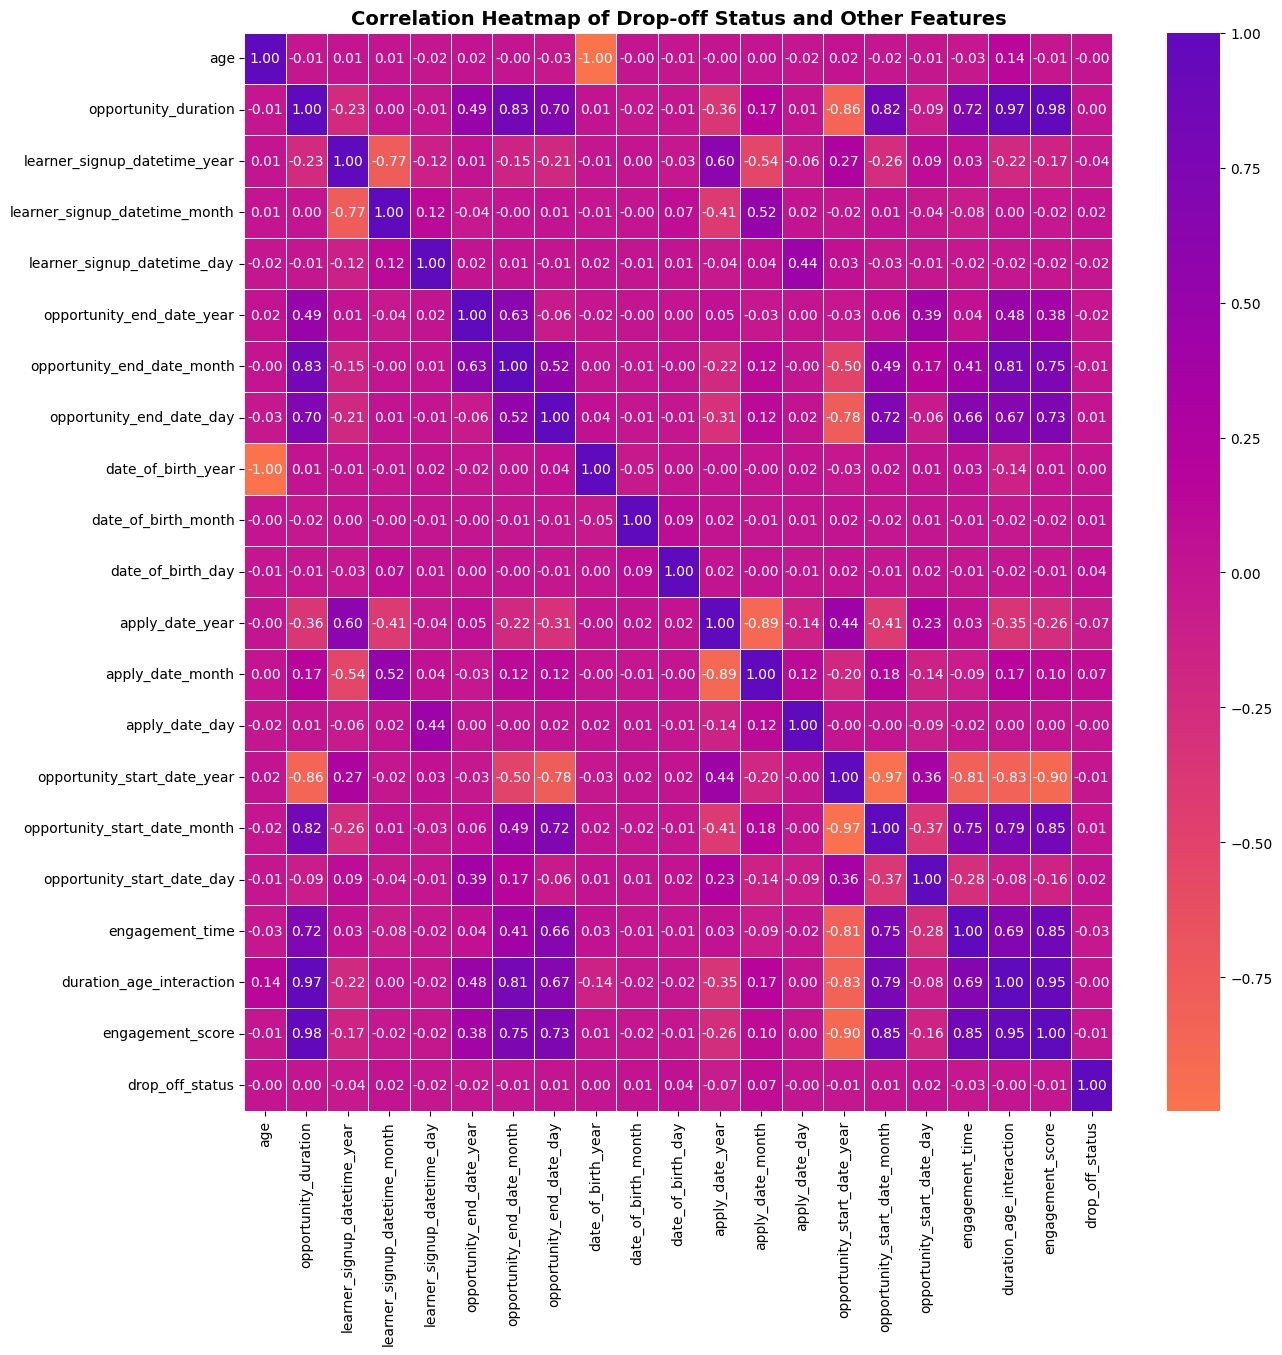

In [91]:
# Creating a custom colormap using your defined color palette
from matplotlib.colors import LinearSegmentedColormap

# Defining a colormap based on your 13-color palette
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", color_palette, N=256)

# Plotting heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=0.5)

# Formatting
plt.title("Correlation Heatmap of Drop-off Status and Other Features", fontsize=14, fontweight="bold")

# Show Plot
plt.show()

In [92]:
# Sorting correlation with "Drop-off Status"
sorted_corr = corr_matrix["drop_off_status"].sort_values(ascending=False)

# Printting sorted correlation values
print("Correlation of features with Drop-off Status:")
print(sorted_corr)

Correlation of features with Drop-off Status:
drop_off_status                  1.000000
apply_date_month                 0.068413
date_of_birth_day                0.043501
learner_signup_datetime_month    0.023629
opportunity_start_date_day       0.015864
date_of_birth_month              0.009727
opportunity_start_date_month     0.007949
opportunity_end_date_day         0.006937
opportunity_duration             0.002430
date_of_birth_year               0.001624
age                             -0.002248
apply_date_day                  -0.002266
duration_age_interaction        -0.003331
engagement_score                -0.006363
opportunity_end_date_month      -0.008491
opportunity_start_date_year     -0.012188
opportunity_end_date_year       -0.015836
learner_signup_datetime_day     -0.020064
engagement_time                 -0.026056
learner_signup_datetime_year    -0.041058
apply_date_year                 -0.074581
Name: drop_off_status, dtype: float64


---
#### **Insights & Recommendations: Correlation of Features with Drop-Off Status**

##### **Insights:**

**1. Weak Positive Correlations with Drop-Off Status**
- The following features have **slight positive correlations** with drop-off status, indicating they might have some influence on increasing drop-offs:
  - **Apply Date Month (0.068)** → Suggests that when learners apply might have a small impact on their likelihood to drop off.
  - **Date of Birth Day (0.044)** → Minor correlation, but younger learners might be more likely to drop off.
  - **Learner Signup Date Month (0.024)** → The month of signup may slightly affect retention.
  - **Opportunity Start Date Day (0.016)** → The day an opportunity starts may influence drop-offs, though very weakly.
  - **Date of Birth Month (0.010)** → Slight correlation, possibly reflecting seasonal patterns in engagement.

**2. Features with Very Low Influence on Drop-Off**
- Features such as **Opportunity Duration (0.002), Opportunity End Date Day (0.007), and Date of Birth Year (0.002)** have **near-zero correlation** with drop-off status.
- This suggests that factors like **how long an opportunity lasts or the specific end date have little impact on whether a learner drops off**.

**3. Negative Correlations Suggesting Higher Retention**
- The following features have **slight negative correlations**, meaning higher values may be linked to better retention:
  - **Age (-0.002)** → Older participants might be slightly more committed.
  - **Engagement Score (-0.006)** → Higher engagement scores reduce drop-offs, but the correlation is weak.
  - **Engagement Time (-0.026)** → More time spent engaging leads to lower drop-offs.
  - **Apply Date Year (-0.075)** → More recent applications correlate with lower drop-off rates, possibly due to improved program structure or learner intent.

##### **Recommendations:**

**1. Improve Retention Strategies Based on Application & Signup Timing**
- Since **Apply Date Month (0.068)** and **Signup Date Month (0.024)** correlate with drop-offs:
  - Identify **specific months with high drop-off rates** and reinforce onboarding efforts during those periods.
  - Introduce **early engagement programs** for applicants signing up in months with historically high drop-offs.
  - Optimize **program start dates** to align with the periods where applicants show better retention.

**2. Leverage Engagement Metrics for Proactive Interventions**
- Since **Engagement Score (-0.006)** and **Engagement Time (-0.026)** negatively correlate with drop-offs:
  - Track **early engagement trends** to identify at-risk learners.
  - Offer **personalized engagement nudges** (emails, reminders, incentives) for participants with low engagement scores.
  - Encourage active participation **through peer discussions, mentor interactions, and interactive sessions**.

**3. Monitor Age-Related Drop-Off Trends**
- Since **Age (-0.002)** slightly correlates with lower drop-offs:
  - Offer **more structured support for younger learners** (mentorship, orientation, or onboarding workshops).
  - Customize communication strategies **for different age groups** to improve engagement.

**4. Optimize Opportunity Start Dates & Durations**
- While **Opportunity Start Date Day (0.016)** has a weak correlation with drop-offs:
  - Analyze **which specific days or weeks** lead to higher drop-offs.
  - Consider flexible start dates **to accommodate learner availability**.
  - Ensure **consistent communication before and after opportunity launch** to keep learners engaged.

**5. Strengthen Early-Stage Engagement Efforts**
- Since **Apply Date Year (-0.075)** shows that **recent applicants have lower drop-offs**, this suggests **improvements in program structure** over time.
  - Continue refining **learner support systems and onboarding strategies**.
  - Collect **feedback from past participants** to identify best practices that contribute to reduced drop-offs.

By addressing these factors and reinforcing engagement at key stages, learner retention can be further improved.


### In Opportunity is there any relation between number of sign ups and drop offs

In [93]:
# Grouping by Opportunity Name and counting sign-ups
opportunity_summary = df.groupby("opportunity_name").agg(
    Signups=("learner_signup_datetime", "count"),  # Total Sign-ups
    Dropoffs=("drop_off_status", "sum")  # Total Drop-offs
).reset_index()

In [94]:
# Sorting data by Sign-ups for better visualization
opportunity_summary = opportunity_summary.sort_values(by="Signups", ascending=False)

In [95]:
# result
opportunity_summary

,opportunity_name,Signups,Dropoffs
3,Career Essentials: Getting Started with Your P...,1410,17
4,Data Visualization,978,10
14,Project Management,833,10
9,Health Care Management,784,20
6,Digital Marketing,558,2
5,Data Visualization Associate,551,5
1,Business Consulting,481,4
15,Project Management Associate,477,1
10,Innovation & Entrepreneurship,419,3
2,CPR/AED Certification,386,5


In [96]:
# Wrapping long opportunity names
opportunity_summary["opportunity_name"] = opportunity_summary["opportunity_name"].apply(lambda x: "\n".join(textwrap.wrap(x, width=15)))

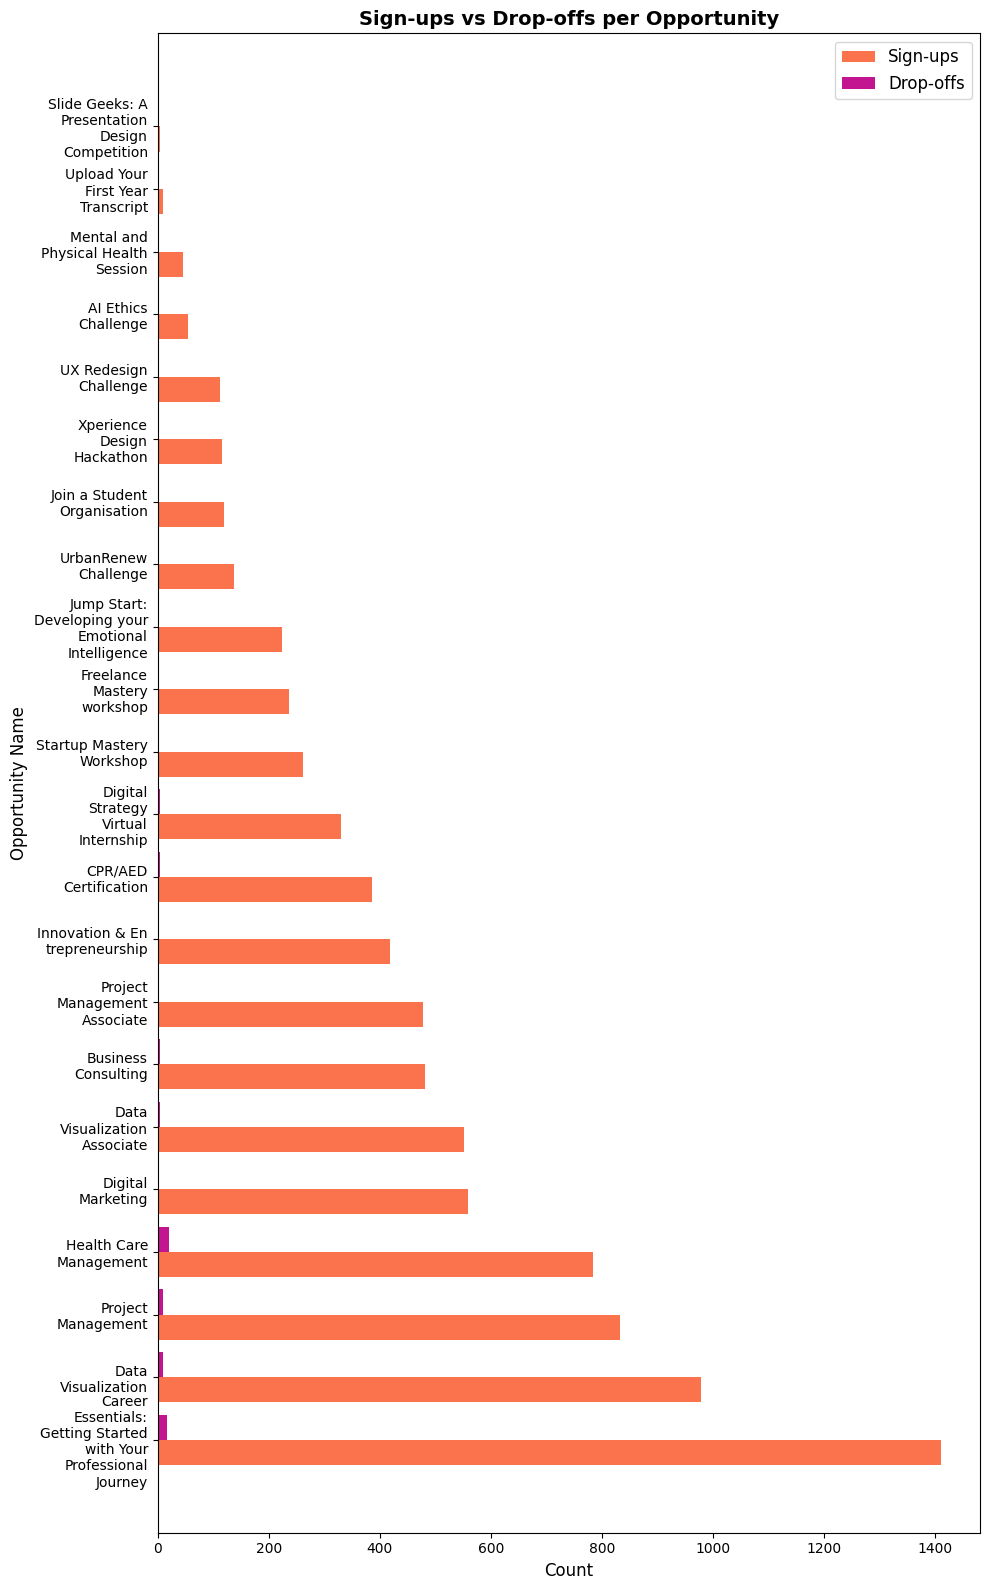

In [97]:
# Setting bar width
bar_width = 0.4
y_positions = np.arange(len(opportunity_summary["opportunity_name"]))  # Y positions for bars

# Selecting two **contrasting** colors from your custom palette
custom_colors = sns.color_palette(color_palette, n_colors=13)
signup_color = custom_colors[0]   # First color for sign-ups
dropoff_color = custom_colors[6]  # A distinct color (6th) for drop-offs

# Plotting Horizontal Clustered Bar Chart
plt.figure(figsize=(10, 16))
plt.barh(y_positions - bar_width/2, opportunity_summary["Signups"], bar_width, label="Sign-ups", color=signup_color)
plt.barh(y_positions + bar_width/2, opportunity_summary["Dropoffs"], bar_width, label="Drop-offs", color=dropoff_color)

# Labels and Title
plt.ylabel("Opportunity Name", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.title("Sign-ups vs Drop-offs per Opportunity", fontsize=14, fontweight="bold")

# Setting y-ticks to opportunity names
plt.yticks(y_positions, opportunity_summary["opportunity_name"], fontsize=10)

# Adding legend
plt.legend(fontsize=12)

# Show Plot
plt.tight_layout()
plt.show()


#### **Insights & Recommendations: Relationship Between Signups and Drop-Offs in Opportunities**

##### **Insights:**

**1. Drop-Offs Are Not Strictly Proportional to Signups**
- Some opportunities with **high signups** show **low drop-off counts**, indicating a strong retention rate.  
  - Example: **"Career Essentials" (1410 signups, 17 drop-offs) → Drop-off Rate ~1.2%**  
  - Example: **"Data Visualization" (978 signups, 10 drop-offs) → Drop-off Rate ~1.0%**  

- However, other opportunities with **moderate signups have relatively higher drop-offs**, indicating possible **engagement challenges**.  
  - Example: **"Health Care Management" (784 signups, 20 drop-offs) → Drop-off Rate ~2.6%**  

**2. Niche Opportunities Have 0% Drop-Offs**
- Certain programs have **zero drop-offs**, suggesting strong participant commitment.  
  - Example: **"Freelance Mastery Workshop" (237 signups, 0 drop-offs)**  
  - Example: **"Jump Start: Emotional Intelligence" (224 signups, 0 drop-offs)**  
  - Example: **"Mental and Physical Health Session" (46 signups, 0 drop-offs)**  
  - These programs likely **offer high engagement or personal value**, leading to full participation.

**3. Opportunities with Fewer Signups Tend to Have Lower Drop-Offs**
- Some **low-signup opportunities also have zero drop-offs**, suggesting high commitment in smaller groups.  
  - Example: **"AI Ethics Challenge" (55 signups, 0 drop-offs)**  
  - Example: **"Slide Geeks: A Presentation Competition" (4 signups, 0 drop-offs)**  

- This implies that **more focused, niche opportunities may attract participants who are fully committed**.

##### **Recommendations:**

**1. Identify & Address High Drop-Off Opportunities**
- Programs like **"Health Care Management" (2.6% drop-off rate)** could benefit from **enhanced onboarding or pre-start engagement efforts**.  
- Investigate whether drop-offs are due to **misaligned expectations, lack of clarity, or engagement challenges**.  

**2. Analyze Factors Contributing to High Retention in Niche Opportunities**
- Programs with **zero drop-offs** should be studied for **best practices** that could be **replicated in larger programs**.  
- Possible factors to explore:
  - **Smaller group sizes leading to higher engagement**  
  - **More interactive or personally relevant content**  
  - **Mentor-driven support systems**  

**3. Improve Onboarding for High-Signup Programs**
- Opportunities like **"Career Essentials" & "Data Visualization" have high participation but still experience some drop-offs**.  
- Introducing **pre-engagement activities, expectation-setting webinars, or structured mentorship** can help reduce early-stage disengagement.  

**4. Experiment with Personalized Support for Medium-Signup, High-Drop-Off Programs**
- Programs with **moderate signups but relatively high drop-offs** (e.g., "Health Care Management") could benefit from:  
  - **Regular check-ins or follow-ups with participants**  
  - **Offering learning incentives or milestone tracking**  
  - **Providing targeted resources to increase motivation**  

**5. Leverage Successful Low-Signup Programs for Future Strategy**
- Some **small-group programs retain 100% of participants**, indicating a **potential strategy for increasing engagement**.  
- Future opportunities could explore:  
  - **More intimate, mentor-led cohorts**  
  - **Hands-on or project-based learning approaches**  
  - **Flexible scheduling to reduce participation barriers**  

By focusing on **engagement strategies tailored to different opportunity types**, overall retention and completion rates can be improved.


### Gender-Opportunity Name-Drop-off Count

In [98]:
gender_opportunity_drop_off_summary = df.groupby(['gender','opportunity_name'])['drop_off_status'].sum().reset_index()
gender_opportunity_drop_off_summary.columns = ['Gender', 'Opportunity','Drop-off Count']

In [99]:
# Creating Pivot table for stacked bar chart
pivot_data2 = gender_opportunity_drop_off_summary.pivot(index="Gender", columns="Opportunity", values="Drop-off Count").fillna(0)

In [100]:
pivot_data2.head() # result

Opportunity,AI Ethics Challenge,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Freelance Mastery workshop,Health Care Management,Innovation & Entrepreneurship,Join a Student Organisation,Jump Start: Developing your Emotional Intelligence,Mental and Physical Health Session,Project Management,Project Management Associate,Slide Geeks: A Presentation Design Competition,Startup Mastery Workshop,UX Redesign Challenge,Upload Your First Year Transcript,UrbanRenew Challenge,Xperience Design Hackathon
Gender,,,,,,,,,,,,,,,,,,,,,,
Don't want to specify,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Female,0.0,3.0,1.0,4.0,2.0,3.0,2.0,2.0,0.0,9.0,2.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Male,0.0,1.0,4.0,12.0,8.0,2.0,0.0,2.0,0.0,10.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Dropping columns where all values are 0
pivot_data2 = pivot_data2.loc[:, ~(pivot_data2.eq(0).all(axis=0))]

In [102]:
# result pivot table
pivot_data2

Opportunity,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Health Care Management,Innovation & Entrepreneurship,Project Management,Project Management Associate,Startup Mastery Workshop,UrbanRenew Challenge
Gender,,,,,,,,,,,,,
Don't want to specify,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Female,3.0,1.0,4.0,2.0,3.0,2.0,2.0,9.0,2.0,7.0,1.0,0.0,0.0
Male,1.0,4.0,12.0,8.0,2.0,0.0,2.0,10.0,1.0,3.0,0.0,2.0,1.0
Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


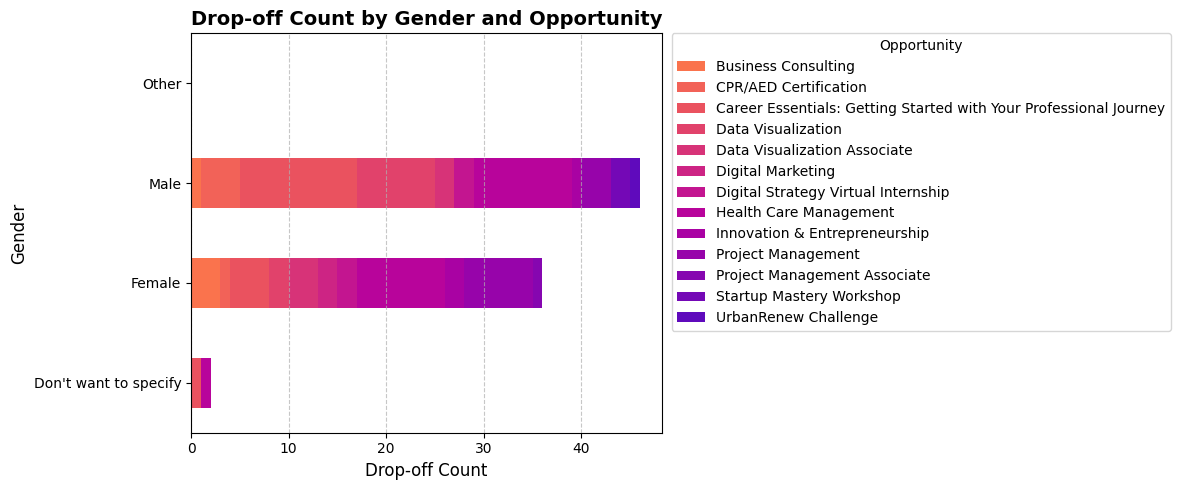

In [103]:
# Adjusting number of colors dynamically based on the number of categories
num_categories = pivot_data2.shape[1]  # Number of stacked bars (Opportunity categories)
colormap = sns.color_palette(color_palette, n_colors=num_categories)

# Creating Stacked Bar Chart
pivot_data2.plot(kind="barh", stacked=True, figsize=(12, 5), color=colormap)

# Enhancing Plot Aesthetics
plt.title("Drop-off Count by Gender and Opportunity", fontsize=14, fontweight="bold")
plt.xlabel("Drop-off Count", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Improving legend readability
plt.legend(title="Opportunity", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()


#### **Insights & Recommendations: Gender-Wise Drop-Offs Across Opportunities**

##### **Insights:**

**1. Higher Drop-Offs Among Males in Key Opportunities**
- Males show the highest drop-offs in **"Career Essentials" (12 drop-offs)** and **"Data Visualization" (8 drop-offs)**.  
- Other notable drop-offs for males include **"Health Care Management" (10 drop-offs)** and **"Project Management" (3 drop-offs)**.  
- This suggests that **certain career-building and skill-based programs face higher disengagement from male participants**.

**2. Female Drop-Offs Are Spread Across Multiple Opportunities**
- Female participants also experience significant drop-offs, particularly in:  
  - **"Health Care Management" (9 drop-offs)**  
  - **"Project Management" (7 drop-offs)**  
  - **"Career Essentials" (4 drop-offs)**  
- However, their drop-off count is more evenly distributed across different programs.  

**3. Minimal Drop-Offs Among "Other" and "Don't Want to Specify" Categories**
- These groups show **very low or zero drop-offs**, suggesting that **participants identifying outside the male/female binary may be more engaged or represent a smaller proportion of total signups**.
- However, **a single drop-off in "Career Essentials" and "Health Care Management" is recorded for the "Don't Want to Specify" category**.

**4. Certain Programs Show No Gender Disparities in Drop-Offs**
- **"Startup Mastery Workshop" and "UrbanRenew Challenge"** show little to no drop-offs across all gender categories, implying **strong engagement or high relevance for all participants**.

---

##### **Recommendations:**

**1. Improve Retention Strategies for Males in High Drop-Off Opportunities**
- Programs like **"Career Essentials" and "Data Visualization"** could introduce **targeted engagement efforts**, such as:
  - More hands-on or **project-based learning** approaches.
  - **Interactive mentorship sessions** to keep learners motivated.
  - **Pre-engagement materials** to align participant expectations.

**2. Address Drop-Off Patterns in Health-Related and Business Programs for Females**
- **"Health Care Management" and "Project Management" show notable female drop-offs.**
  - Conduct surveys or feedback sessions to understand **challenges faced by female learners**.
  - Introduce **support networks, discussion forums, or additional career guidance** to enhance engagement.

**3. Analyze Why Certain Groups Have Low or No Drop-Offs**
- The **"Other" and "Don't Want to Specify"** categories show little to no disengagement.
  - Identify factors contributing to **higher commitment in these groups**.
  - Apply insights to **enhance engagement strategies for higher drop-off demographics**.

**4. Leverage Success Factors from Low Drop-Off Programs**
- **Opportunities like "Startup Mastery Workshop" and "UrbanRenew Challenge" have little to no drop-offs across genders.**
  - Study engagement models in these programs.
  - Apply similar strategies to higher drop-off programs (e.g., shorter duration, interactive sessions, mentorship support).

By tailoring engagement strategies based on gender-specific insights, **retention rates can be improved, ensuring a more inclusive and effective learning experience for all participants**.


### Opportunity Category-Opportunity Name-Drop Off Count

In [104]:
OpportunityCategory_opportunity_drop_off_summary = df.groupby(['opportunity_category','opportunity_name'])['drop_off_status'].sum().reset_index()
OpportunityCategory_opportunity_drop_off_summary.columns = ['Opportunity Category', 'Opportunity','Drop-off Count']

In [105]:
# Creating Pivot table for stacked bar chart
pivot_data3 = OpportunityCategory_opportunity_drop_off_summary.pivot(index="Opportunity Category", columns="Opportunity", values="Drop-off Count").fillna(0)

In [106]:
pivot_data3.head() # result

Opportunity,AI Ethics Challenge,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Freelance Mastery workshop,Health Care Management,Innovation & Entrepreneurship,Join a Student Organisation,Jump Start: Developing your Emotional Intelligence,Mental and Physical Health Session,Project Management,Project Management Associate,Slide Geeks: A Presentation Design Competition,Startup Mastery Workshop,UX Redesign Challenge,Upload Your First Year Transcript,UrbanRenew Challenge,Xperience Design Hackathon
Opportunity Category,,,,,,,,,,,,,,,,,,,,,,
Competition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Course,0.0,0.0,5.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Engagement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Internship,0.0,4.0,0.0,0.0,10.0,5.0,2.0,4.0,0.0,20.0,3.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# Dropping columns where all values are 0
pivot_data3 = pivot_data3.loc[:, ~(pivot_data3.eq(0).all(axis=0))]

In [108]:
# resultant pivot table
pivot_data3

Opportunity,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Health Care Management,Innovation & Entrepreneurship,Project Management,Project Management Associate,Startup Mastery Workshop,UrbanRenew Challenge
Opportunity Category,,,,,,,,,,,,,
Competition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Course,0.0,5.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Engagement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Event,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
Internship,4.0,0.0,0.0,10.0,5.0,2.0,4.0,20.0,3.0,10.0,1.0,0.0,0.0


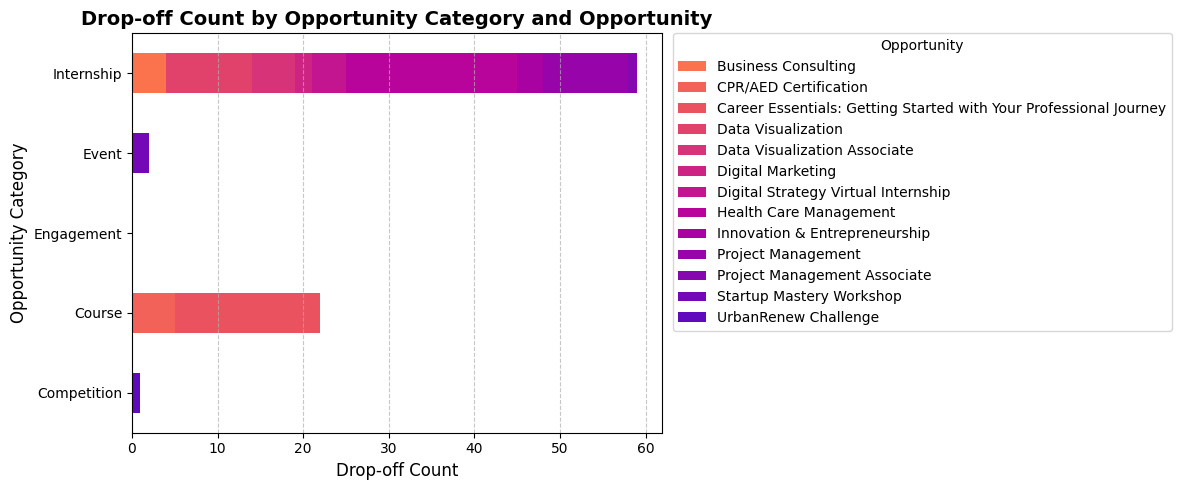

In [109]:
# Adjusting number of colors dynamically based on the number of categories
num_categories = pivot_data3.shape[1]  # Number of stacked bars (Opportunity categories)
colormap = sns.color_palette(color_palette, n_colors=num_categories)

# Creating Stacked Bar Chart
pivot_data3.plot(kind="barh", stacked=True, figsize=(12, 5), color=colormap)

# Enhancing Plot Aesthetics
plt.title("Drop-off Count by Opportunity Category and Opportunity", fontsize=14, fontweight="bold")
plt.xlabel("Drop-off Count", fontsize=12)
plt.ylabel("Opportunity Category", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Improve legend readability
plt.legend(title="Opportunity", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()


#### **Insights & Recommendations: Drop-Offs by Opportunity Category**

##### **Insights:**

**1. Courses Experience the Highest Drop-Offs**
- The **"Course" category** shows the highest drop-offs, with:  
  - **"Career Essentials" (17 drop-offs)**  
  - **"CPR/AED Certification" (5 drop-offs)**  
- This indicates that **learners may struggle with course-related factors such as difficulty level, time commitment, or unclear expectations**.

**2. Minimal Drop-Offs in Competitions and Events**
- **"Competitions" and "Events" have significantly lower drop-offs**:
  - **Only 1 drop-off recorded in "UrbanRenew Challenge" (Competition).**
  - **Only 2 drop-offs recorded in "Startup Mastery Workshop" (Event).**
- This suggests that **these categories are more engaging, potentially due to their interactive nature or shorter duration**.

**3. No Drop-Offs in Engagement-Based Opportunities**
- **All engagement-based opportunities have a 0% drop-off rate.**
- This could indicate **strong participant interest or well-structured engagement models**.

---

##### **Recommendations:**

**1. Address High Drop-Offs in Course-Based Opportunities**
- Courses like **"Career Essentials" and "CPR/AED Certification"** should consider:
  - **Clearer learning pathways** to help learners track progress.
  - **Modular or flexible learning structures** to reduce overwhelming workloads.
  - **Incorporating interactive elements** like quizzes or peer discussions to maintain engagement.

**2. Leverage Best Practices from Competitions and Events**
- Since **competitions and events** have low drop-offs, their **engagement strategies** should be studied and applied to courses.
  - Consider **gamification elements** in courses.
  - Introduce **live elements (challenges, webinars, or discussions)** within courses.

**3. Improve Pre-Course Orientation to Reduce Drop-Offs**
- Providing **pre-enrollment guidance and introductory materials** can help learners set the right expectations before starting.
- **Surveys or feedback collection** post-drop-off can identify the key pain points for improvement.

**4. Expand Engagement-Based Opportunities**
- Since engagement-based opportunities **show 0 drop-offs**, more such programs should be introduced.
- **Combining engagement elements within courses** (e.g., peer collaborations, live mentoring) may also reduce drop-offs.

By refining course structures and incorporating engagement strategies from successful opportunity categories, **overall retention can be improved, leading to a more fulfilling learning experience for participants**.


### Country-Opportunity Name-Drop Off Count

In [110]:
country_opportunity_drop_off_summary = df.groupby(['country','opportunity_name'])['drop_off_status'].sum().reset_index()
country_opportunity_drop_off_summary.columns = ['Country', 'Opportunity','Drop-off Count']

In [111]:
# Creating Pivot table for stacked bar chart
pivot_data4 = country_opportunity_drop_off_summary.pivot(index="Country", columns="Opportunity", values="Drop-off Count").fillna(0)

In [112]:
pivot_data4.head() # result

Opportunity,AI Ethics Challenge,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Freelance Mastery workshop,Health Care Management,Innovation & Entrepreneurship,Join a Student Organisation,Jump Start: Developing your Emotional Intelligence,Mental and Physical Health Session,Project Management,Project Management Associate,Slide Geeks: A Presentation Design Competition,Startup Mastery Workshop,UX Redesign Challenge,Upload Your First Year Transcript,UrbanRenew Challenge,Xperience Design Hackathon
Country,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# dropping rows & columns where all values are 0
pivot_data4 = pivot_data4.loc[~(pivot_data4.eq(0).all(axis=1))] # for rows
pivot_data4 = pivot_data4.loc[:, ~(pivot_data4.eq(0).all(axis=0))] # for columns

In [114]:
# resultant pivot table
pivot_data4

Opportunity,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Health Care Management,Innovation & Entrepreneurship,Project Management,Project Management Associate,Startup Mastery Workshop,UrbanRenew Challenge
Country,,,,,,,,,,,,,
Belarus,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
India,1.0,1.0,8.0,9.0,3.0,2.0,1.0,7.0,2.0,5.0,0.0,2.0,0.0
Nigeria,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Pakistan,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Philippines,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Sierra Leone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
United Kingdom,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
United States,3.0,4.0,4.0,0.0,2.0,0.0,3.0,10.0,0.0,5.0,1.0,0.0,1.0


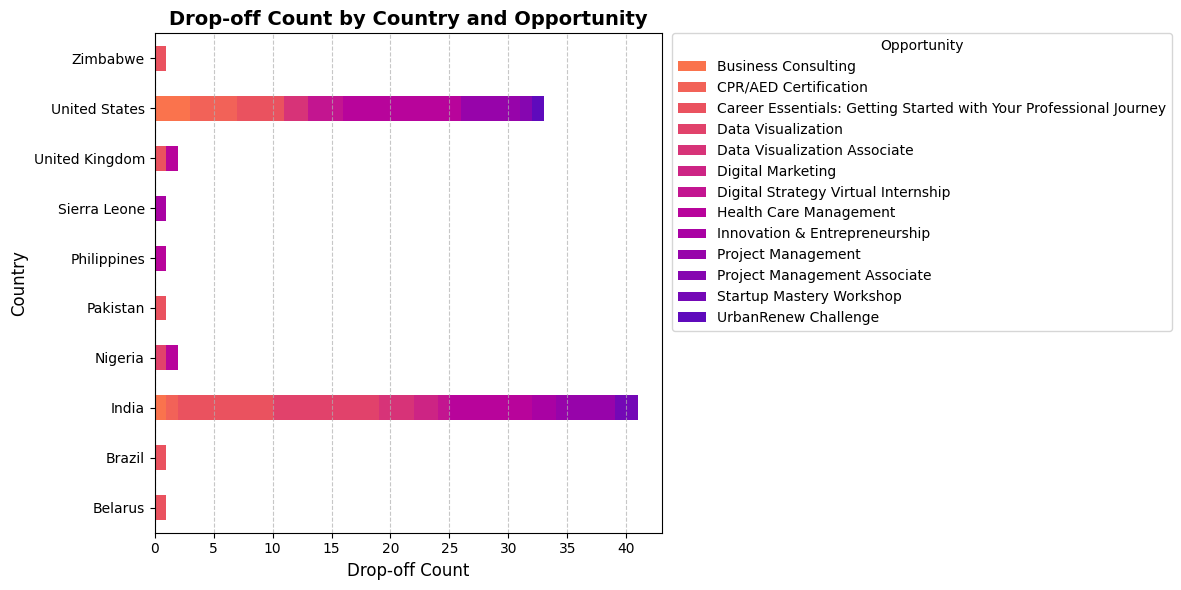

In [115]:
# Adjusting number of colors dynamically based on the number of categories
num_categories = pivot_data4.shape[1]  # Number of stacked bars (Opportunity categories)
colormap = sns.color_palette(color_palette, n_colors=num_categories)

# Creating Stacked Bar Chart
pivot_data4.plot(kind="barh", stacked=True, figsize=(12, 6), color=colormap)

# Enhancing Plot Aesthetics
plt.title("Drop-off Count by Country and Opportunity", fontsize=14, fontweight="bold")
plt.xlabel("Drop-off Count", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Improve legend readability
plt.legend(title="Opportunity", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()


#### **Insights & Recommendations: Drop-Offs by Country and Opportunity**

##### **Insights:**

**1. India and the United States Have the Highest Drop-Offs**
- **India (39%) and the United States (32%) account for most drop-offs.**
  - **India:** High drop-offs in **"Career Essentials" (8), "Data Visualization" (9), and "Health Care Management" (7).**
  - **United States:** Highest in **"Health Care Management" (10) and "CPR/AED Certification" (4).**
- This suggests that **factors such as course difficulty, time commitment, or program accessibility could be impacting engagement.**

**2. Minimal Drop-Offs in Other Countries**
- **Brazil, Pakistan, and Belarus show only 1 drop-off each**, mainly in **"Career Essentials."**
- **Sierra Leone, Philippines, Nigeria, and the UK have extremely low drop-offs** (mostly 1 per opportunity).
- This could mean that learners in these regions **are more selective in participation or highly committed once they sign up.**

**3. Certain Opportunities Have High Drop-Offs Across Multiple Countries**
- **"Career Essentials" had drop-offs in Belarus, Brazil, India, Pakistan, the UK, the US, and Zimbabwe.**
- **"Health Care Management" had drop-offs in India, Nigeria, the Philippines, the UK, and the US.**
- This suggests that these opportunities **may have structural issues that cause disengagement across different demographics.**

---

##### **Recommendations:**

**1. Investigate Reasons for High Drop-Offs in India and the US**
- Conduct **learner feedback surveys** to understand challenges such as:
  - Course difficulty, lack of time, or unclear expectations.
- **Personalized onboarding** (webinars, support groups) can improve retention.

**2. Improve Course Engagement for Career Essentials & Health Care Management**
- **Career Essentials and Health Care Management show repeated drop-offs across multiple countries.**
  - Introduce **interactive learning modules** or **mentorship programs** to improve engagement.
  - Ensure **regional relevance** by adapting content for local job markets.

**3. Address Barriers to Completion in High Drop-Off Countries**
- For the **United States**, where "Health Care Management" and "CPR/AED Certification" show significant drop-offs:
  - **Offer flexible learning schedules** to accommodate learners' time constraints.
  - **Highlight certification benefits** to encourage completion.

- For **India**, where Data Visualization and Career Essentials show high drop-offs:
  - **Provide project-based learning** and **real-world case studies** to boost practical engagement.

**4. Maintain Current Best Practices for Low Drop-Off Countries**
- Countries like **Zimbabwe, Nigeria, and Sierra Leone** have minimal drop-offs.
  - **Understand what keeps these learners engaged** and **replicate those strategies in high-drop-off regions**.

**5. Implement a Regionalized Retention Strategy**
- **Localized support teams** for high-drop-off regions can **help address specific concerns**.
- Offer **regional networking events** to keep learners engaged through peer support.

By understanding the **drop-off trends across different countries and opportunities**, we can enhance **engagement strategies, optimize course structures, and improve overall retention rates**.


### Institute-Opportunity Name-Drop Off Count

In [116]:
institute_opportunity_drop_off_summary = df.groupby(['institution_name','opportunity_name'])['drop_off_status'].sum().reset_index()
institute_opportunity_drop_off_summary.columns = ['Institution', 'Opportunity','Drop-off Count']

In [117]:
# Creating Pivot table for stacked bar chart
pivot_data5 = institute_opportunity_drop_off_summary.pivot(index="Institution", columns="Opportunity", values="Drop-off Count").fillna(0)

In [118]:
pivot_data5.head() # result

Opportunity,AI Ethics Challenge,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Freelance Mastery workshop,Health Care Management,Innovation & Entrepreneurship,Join a Student Organisation,Jump Start: Developing your Emotional Intelligence,Mental and Physical Health Session,Project Management,Project Management Associate,Slide Geeks: A Presentation Design Competition,Startup Mastery Workshop,UX Redesign Challenge,Upload Your First Year Transcript,UrbanRenew Challenge,Xperience Design Hackathon
Institution,,,,,,,,,,,,,,,,,,,,,,
AAMUSTED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABC Inter College,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ABN and PRR College of Science,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACE Engineering College,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACP college,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Drop rows & columns where all values are 0
pivot_data5 = pivot_data5.loc[~(pivot_data5.eq(0).all(axis=1))]
pivot_data5 = pivot_data5.loc[:, ~(pivot_data5.eq(0).all(axis=0))]

In [120]:
# result table
pivot_data5

Opportunity,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Health Care Management,Innovation & Entrepreneurship,Project Management,Project Management Associate,Startup Mastery Workshop,UrbanRenew Challenge
Institution,,,,,,,,,,,,,
ABC Inter College,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Achievers University Owo Ondo State,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Banaras Hindu University,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gomel High School,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gurunanak institute of technical campus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
IFET COLLEGE OF ENGINEERING,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IFSC - Instituto Federal de EducaÃÂ§ÃÂ£o CiÃÂªncia e Tecnologia de Santa Catarina- Campus Joinville,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Illinois Institute of Technology,0.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0
International Institute of Information Technology Bangalore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


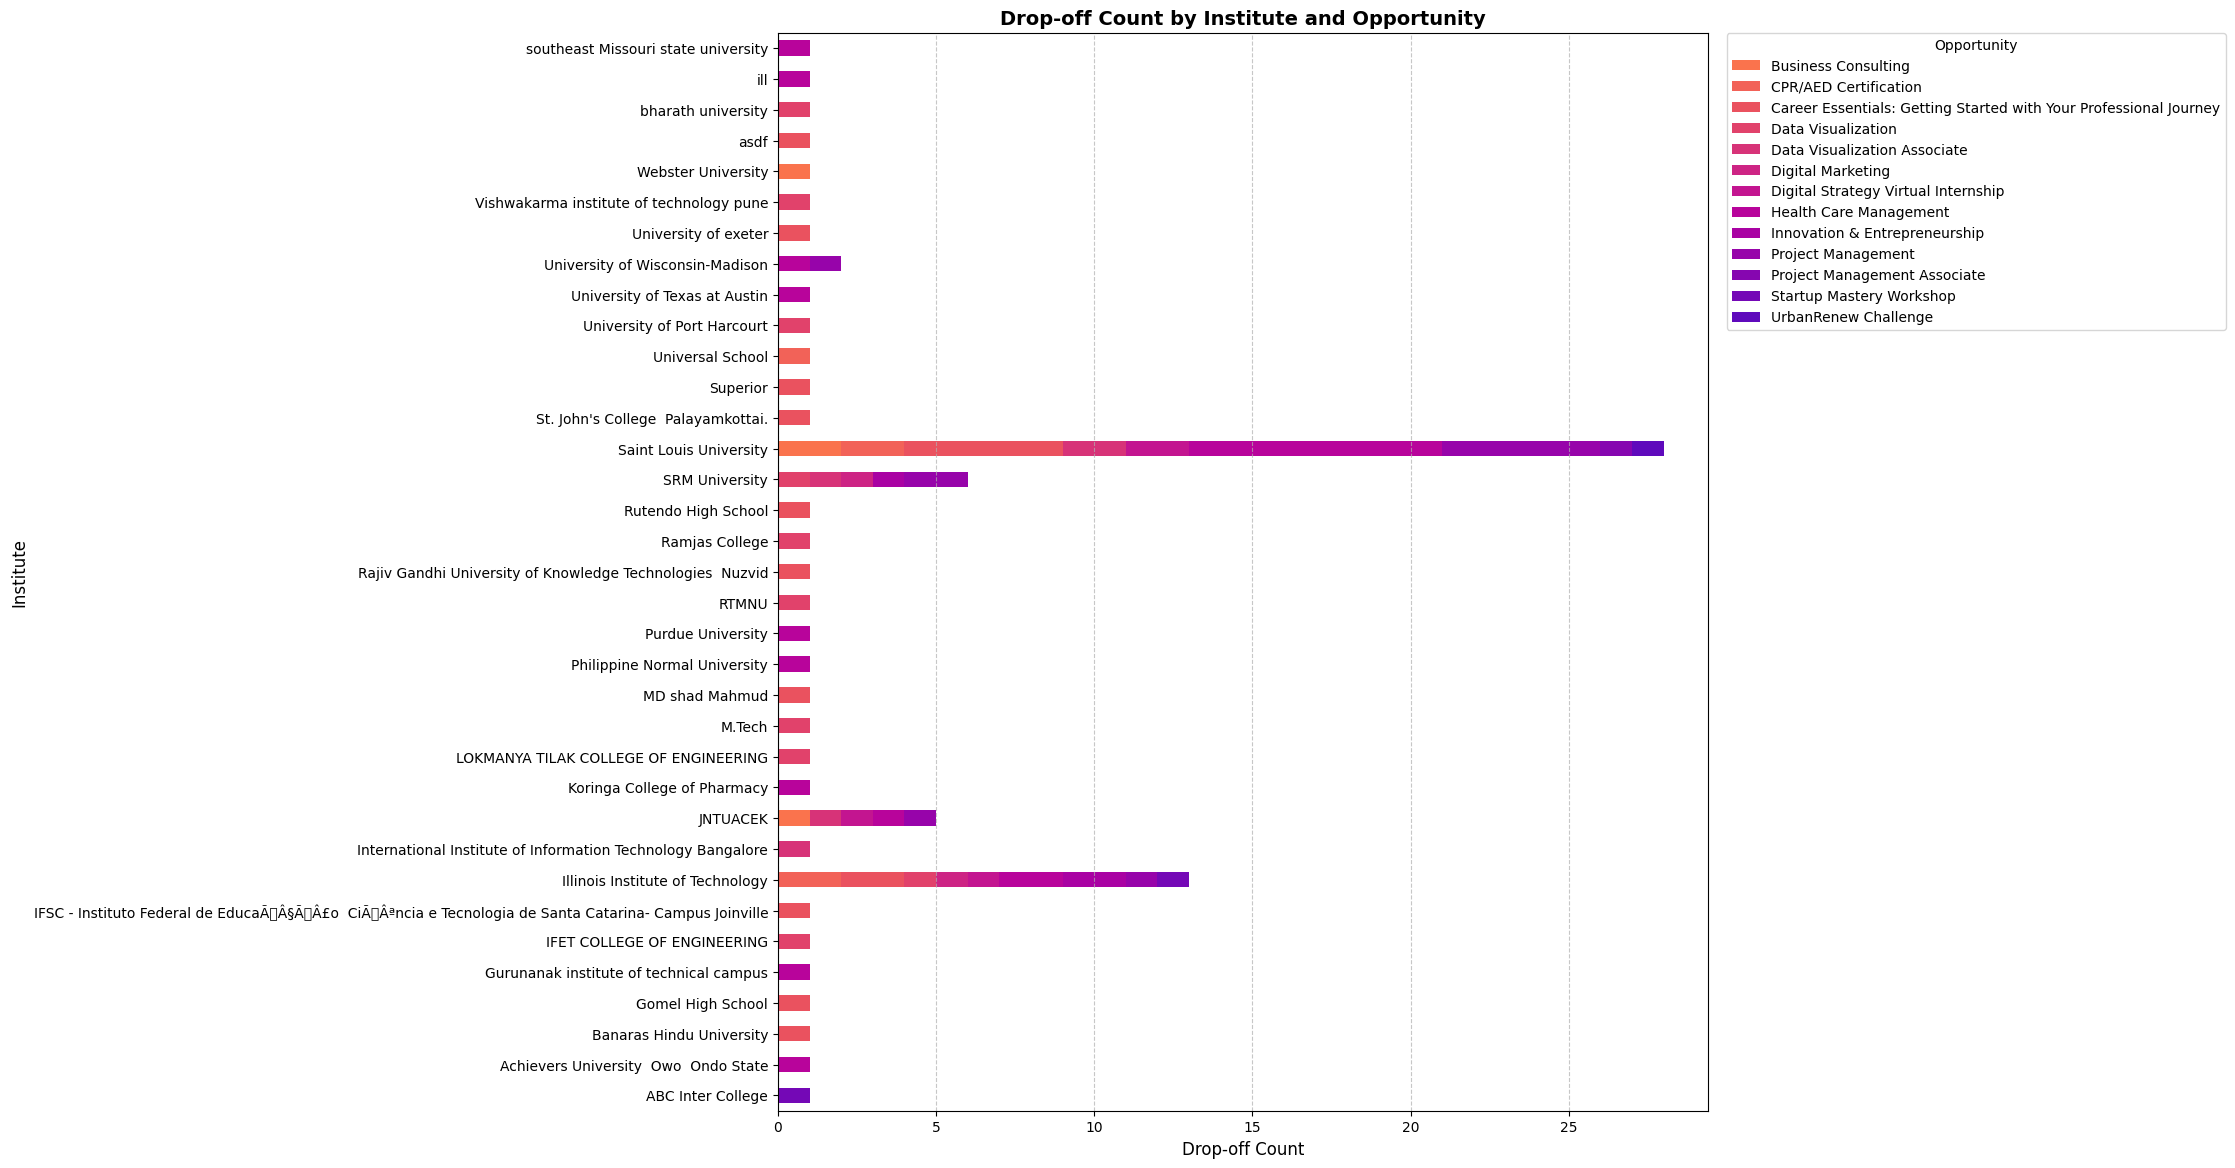

In [121]:
# Adjusting number of colors dynamically based on the number of categories
num_categories = pivot_data5.shape[1]  # Number of stacked bars (Opportunity categories)
colormap = sns.color_palette(color_palette, n_colors=num_categories)

# Creating Stacked Bar Chart
pivot_data5.plot(kind="barh", stacked=True, figsize=(12, 14), color=colormap)

# Enhancing Plot Aesthetics
plt.title("Drop-off Count by Institute and Opportunity", fontsize=14, fontweight="bold")
plt.xlabel("Drop-off Count", fontsize=12)
plt.ylabel("Institute", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Improved legend readability
plt.legend(title="Opportunity", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()


#### **Insights & Recommendations: Drop-Offs by Institution and Opportunity**

##### **Insights:**

**1. Saint Louis University Has the Highest Drop-Offs**
- Saint Louis University exhibits **the highest number of drop-offs (26 in total)** across multiple opportunities:
  - **Health Care Management (8)**
  - **Career Essentials (5)**
  - **Project Management (5)**
  - **Business Consulting (2)**
  - **CPR/AED Certification (2)**
  - **Data Visualization Associate (2)**
  - **Digital Strategy Virtual Internship (2)**
  - **UrbanRenew Challenge (1)**
- The wide spread of drop-offs indicates **a systemic issue**—potentially **course structure, workload, or a lack of engagement strategies**.

**2. Illinois Institute of Technology Shows Moderate Drop-Offs Across Various Opportunities**
- Drop-offs are present in:
  - **CPR/AED Certification (2)**
  - **Career Essentials (2)**
  - **Data Visualization (1)**
  - **Digital Marketing (1)**
  - **Health Care Management (2)**
  - **Innovation & Entrepreneurship (2)**
  - **Project Management (1)**
  - **Startup Mastery Workshop (1)**
- The presence of drop-offs in **multiple categories** suggests that students may be **struggling with balancing multiple engagements**.

**3. Health Care Management Shows Consistently High Drop-Offs Across Institutions**
- Universities with **high Health Care Management drop-offs**:
  - Saint Louis University (8)
  - Achievers University Owo Ondo State (1)
  - Gurunanak Institute of Technical Campus (1)
  - Illinois Institute of Technology (2)
  - Philippine Normal University (1)
  - Purdue University (1)
  - University of Texas at Austin (1)
  - University of Wisconsin-Madison (1)
- Indicates that **students may find this course demanding or lack necessary guidance**.

**4. Certain Institutes Show Isolated Drop-Offs**
- Institutions with **single drop-offs in various opportunities**:
  - **Banaras Hindu University (Career Essentials)**
  - **Rajiv Gandhi University (Career Essentials)**
  - **Rutendo High School (Career Essentials)**
  - **University of Exeter (Career Essentials)**
  - **JNTUACEK (Business Consulting, Data Visualization Associate, Digital Strategy Virtual Internship, Health Care Management, Project Management)**
  - **SRM University (Multiple drop-offs in Project Management and Innovation & Entrepreneurship)**

---

**Recommendations:**

**1. Investigate Reasons for High Drop-Offs at Saint Louis University**
- Conduct **student surveys** to understand **barriers to course completion**.
- Offer **mentorship programs or peer learning groups** to boost engagement.
- Evaluate if the **workload is too high** and make necessary adjustments.

**2. Support Students from Illinois Institute of Technology**
- Since drop-offs are spread across **multiple opportunities**, students may be **overloaded**.
- **Provide better course guidance** on how to manage workload.
- Introduce **time management resources** or structured study plans.

**3. Improve Engagement for Health Care Management**
- Health Care Management **consistently faces drop-offs** across institutions.
- **Revise course structure** to make it more **interactive** and **practical**.
- **Ensure clear learning outcomes** and **offer more support materials**.

**4. Address Drop-Offs in Career Essentials**
- Career Essentials sees **repeated drop-offs across multiple institutions**.
- Provide **career counseling sessions** to help students understand its value.
- Offer **smaller milestone achievements** to keep students motivated.

**5. Customize Retention Strategies for Each Institution**
- Partner with **high-drop-off institutions** to provide **personalized intervention plans**.
- Use **institutional analytics** to **identify early signs of disengagement** and act proactively.
- Create **regional or institution-specific student engagement initiatives**.

By **understanding institutional-level drop-offs**, we can **enhance course structure, optimize learning experiences, and improve student retention across different universities**.


### Major-Opportunity Name-Drop Off Count

In [122]:
major_opportunity_drop_off_summary = df.groupby(['current/intended_major','opportunity_name'])['drop_off_status'].sum().reset_index()
major_opportunity_drop_off_summary.columns = ['Major', 'Opportunity','Drop-off Count']

In [123]:
# Creating Pivot table for stacked bar chart
pivot_data6 = major_opportunity_drop_off_summary.pivot(index="Major", columns="Opportunity", values="Drop-off Count").fillna(0)

In [125]:
pivot_data6.head() # result

Opportunity,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Health Care Management,Innovation & Entrepreneurship,Project Management,Project Management Associate,Startup Mastery Workshop,UrbanRenew Challenge
Major,,,,,,,,,,,,,
Analytics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Artificial Intelligence,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Artificial Intelligence And Machine Learning,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biology,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chemical Engineering,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# Drop columns where all values are 0
pivot_data6 = pivot_data6.loc[~(pivot_data6.eq(0).all(axis=1))] # for rows
pivot_data6 = pivot_data6.loc[:, ~(pivot_data6.eq(0).all(axis=0))] # for columns

In [127]:
# result
pivot_data6.head()

Opportunity,Business Consulting,CPR/AED Certification,Career Essentials: Getting Started with Your Professional Journey,Data Visualization,Data Visualization Associate,Digital Marketing,Digital Strategy Virtual Internship,Health Care Management,Innovation & Entrepreneurship,Project Management,Project Management Associate,Startup Mastery Workshop,UrbanRenew Challenge
Major,,,,,,,,,,,,,
Analytics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Artificial Intelligence,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Artificial Intelligence And Machine Learning,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biology,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chemical Engineering,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


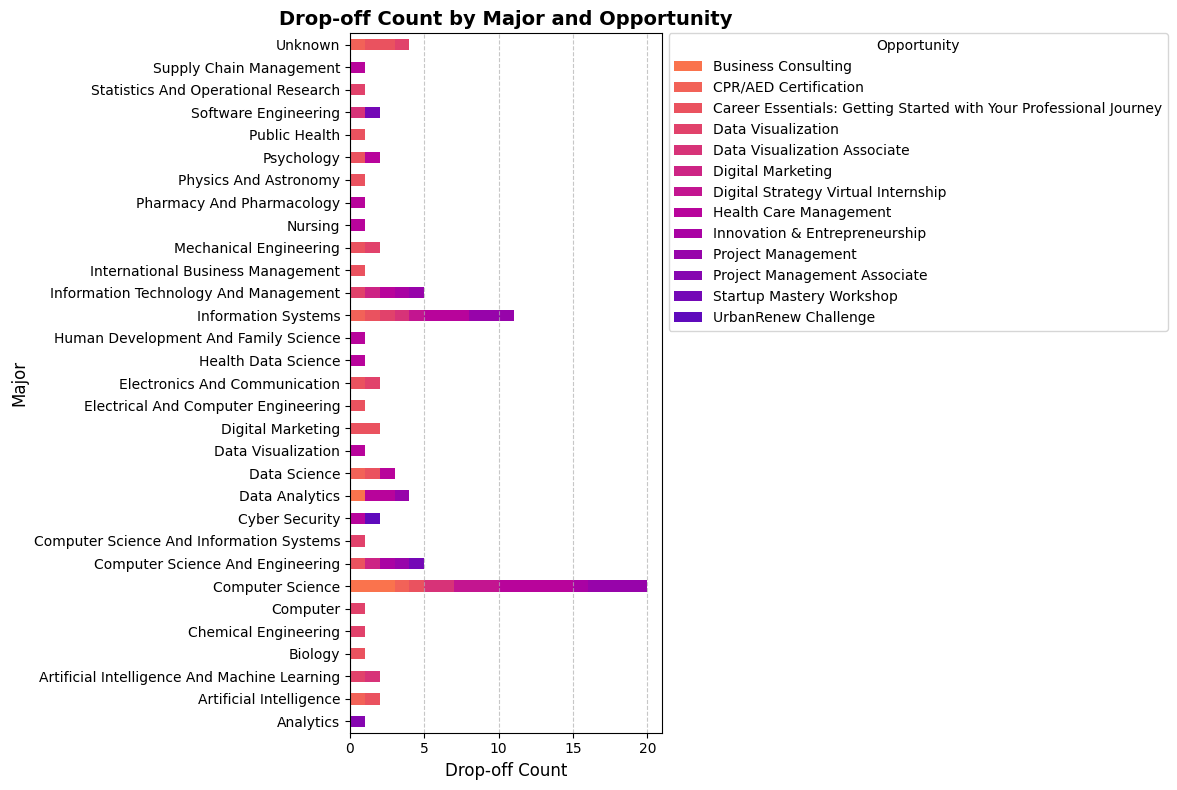

In [128]:
# Adjusting number of colors dynamically based on the number of categories
num_categories = pivot_data6.shape[1]  # Number of stacked bars (Opportunity categories)
colormap = sns.color_palette(color_palette, n_colors=num_categories)

# Creating Stacked Bar Chart
pivot_data6.plot(kind="barh", stacked=True, figsize=(12, 8), color=colormap)

# Enhancing Plot Aesthetics
plt.title("Drop-off Count by Major and Opportunity", fontsize=14, fontweight="bold")
plt.xlabel("Drop-off Count", fontsize=12)
plt.ylabel("Major", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Improved legend readability
plt.legend(title="Opportunity", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()


#### **Insights & Recommendations: Drop-Offs by Major and Opportunity**

##### **Insights:**

**1. Computer Science Students Have the Highest Drop-Offs**
- Computer Science has **the highest number of drop-offs (20 in total)** across various opportunities:
  - **Business Consulting (3)**
  - **CPR/AED Certification (1)**
  - **Career Essentials (1)**
  - **Data Visualization Associate (2)**
  - **Digital Strategy Virtual Internship (3)**
  - **Health Care Management (5)**
  - **Innovation & Entrepreneurship (1)**
  - **Project Management (4)**
- The spread across multiple categories suggests that **students might be overwhelmed with coursework or struggling to find relevance in non-technical opportunities**.

**2. High Drop-Offs in Health-Related Majors for Health Care Management**
- Students from **Health Data Science, Nursing, Pharmacy & Pharmacology, Psychology, and Public Health** all show drop-offs in **Health Care Management**.
- Indicates potential **misalignment between course expectations and student backgrounds** or **a need for better support in health-related professional development**.

**3. Career Essentials Faces Drop-Offs Across Various Majors**
- High drop-offs in **Career Essentials** from:
  - **Artificial Intelligence (1)**
  - **Biology (1)**
  - **Computer Science (1)**
  - **Computer Science & Engineering (1)**
  - **Data Science (1)**
  - **Digital Marketing (2)**
  - **Electrical & Computer Engineering (1)**
  - **Electronics & Communication (1)**
  - **International Business Management (1)**
  - **Physics & Astronomy (1)**
  - **Public Health (1)**
  - **Unknown (2)**
- Suggests that **students may not find Career Essentials engaging or relevant** to their field.
- Some students may already have **industry exposure** and feel the course is redundant.

**4. Information Systems and Data-Related Majors Show Drop-Offs in Key Areas**
- **Information Systems students** drop off in:
  - **CPR/AED Certification (1)**
  - **Career Essentials (1)**
  - **Data Visualization (1)**
  - **Data Visualization Associate (1)**
  - **Digital Strategy Virtual Internship (1)**
  - **Health Care Management (3)**
  - **Project Management (3)**
- **Data Analytics & Data Science drop-offs** in Health Care Management indicate potential **mismatch with expectations**.

**5. Engineering & Technical Majors Face Drop-Offs in Business and Soft Skills Courses**
- **Mechanical, Chemical, and Software Engineering students drop off in**:
  - **Data Visualization**
  - **Startup Mastery Workshop**
  - **Project Management**
- Suggests a **possible lack of interest in non-technical courses**.

---

##### **Recommendations:**

**1. Address High Drop-Offs in Computer Science**
- Offer **additional mentorship or industry-relevant content** to help students **see value in non-technical courses**.
- Adjust course materials to be more **tech-industry-focused** where possible.
- Introduce **interactive elements (coding projects, AI applications, or hackathons)** to retain engagement.

**2. Improve Health Care Management Course Engagement**
- Since multiple health-related majors have drop-offs in **Health Care Management**, consider:
  - **Practical case studies** and **real-world applications**.
  - Guest lectures from **industry professionals** to provide practical insights.
  - **Better alignment of course content** with student backgrounds.

**3. Enhance Career Essentials Course to Improve Relevance**
- Many students from various majors drop out of **Career Essentials**, indicating a **potential disconnect**.
- Recommendations:
  - **Tailor content based on major** (e.g., technical job preparation for CS students, business-oriented resumes for management students).
  - Provide **major-specific career pathways** within the course.
  - Introduce **interactive assignments like mock interviews or career planning workshops**.

**4. Improve Retention in Information Systems & Data Fields**
- Students in **Data Science, Data Analytics, and Information Systems** are **dropping off from Data Visualization and Project Management**.
- Recommendations:
  - Make content **more hands-on** with **industry-relevant projects**.
  - Add **real-world case studies** to show how data visualization and project management are **essential in tech and analytics careers**.

**5. Increase Engagement for Engineering Students in Business & Soft Skills Courses**
- Many **engineering students struggle with business-focused opportunities**.
- Recommendations:
  - Provide **technical-business hybrid courses** that relate business concepts to engineering.
  - Offer **case studies of engineering leaders** applying business skills in **product management, consulting, and entrepreneurship**.
  - Add **technical project management elements** to retain interest.

By **aligning opportunities with major-specific expectations** and enhancing engagement strategies, we can **reduce drop-offs and improve completion rates across different academic backgrounds**.


---
## **Summary: Churn Analysis and Reduction Strategies**

The drop-off patterns across institutions, majors, and opportunities indicate **churn in student engagement**, primarily driven by **misalignment between expectations and content, lack of perceived relevance, and potential workload conflicts**.

### **Key Drivers of Churn:**
1. **Mismatch Between Course Content and Student Backgrounds**  
   - High drop-offs in **technical students** (Computer Science, Engineering) for **non-technical courses** (Business Consulting, Career Essentials).  
   - Health-related majors showing disengagement in **Health Care Management**, suggesting **expectation gaps**.  

2. **Lack of Perceived Value or Engagement**  
   - Courses like **Career Essentials and Digital Strategy Virtual Internship** experience drop-offs across diverse majors, implying **content may not be engaging or perceived as beneficial**.  
   - Engineering students tend to drop off from **soft-skill courses**, indicating **low interest in non-technical learning paths**.  

3. **Workload and Overlap Issues**  
   - Institutions with multiple drop-offs may indicate **academic workload conflicts**, leading students to **prioritize core subjects over optional opportunities**.  
   - High churn in **Computer Science and Information Systems students** across multiple opportunities suggests **overcommitment to multiple initiatives without completion**.  

### **Strategies to Reduce Churn:**
1. **Personalized and Relevant Course Structuring**  
   - Tailor courses based on **major-specific applications** (e.g., **tech-focused business courses for CS students, case studies for health students**).  
   - Provide **modular, flexible learning paths** to allow students to engage with the most relevant content.  

2. **Improved Engagement Tactics**  
   - Introduce **hands-on projects, industry case studies, and gamification** to retain interest.  
   - Offer **interactive mentorship sessions and career guidance** tailored to major-specific career paths.  

3. **Churn Prediction and Proactive Intervention**  
   - Use **early drop-off detection** to trigger **personalized reminders, peer support systems, or incentive-based engagement strategies**.  
   - Collect **feedback from dropouts** to continuously refine course structures and delivery.  

By **aligning opportunities with student expectations, enhancing engagement tactics, and proactively addressing churn triggers**, institutions can significantly **reduce drop-offs and improve student retention rates**.  
